In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
def load_and_prepare_data(excel_file):
    """
    Load data from Excel file with heat_id and series
    """
    try:
        # Read Excel file
        df = pd.read_excel(excel_file)
        
        # Validate required columns
        required_columns = ['date', 'eaf_total_kwh', 'liquid_metal_tons', 'grade']
        optional_columns = ['heat_id', 'series']
        
        missing_required = [col for col in required_columns if col not in df.columns]
        
        if missing_required:
            raise ValueError(f"Missing required columns: {missing_required}")
        
        print("✅ Required columns found: date, eaf_total_kwh, liquid_metal_tons, grade")
        
        # Check for optional columns
        has_heat_id = 'heat_id' in df.columns
        has_series = 'series' in df.columns
        
        if has_heat_id:
            print("✅ Heat ID data available")
        if has_series:
            print("✅ Series data available")
        
        # Data cleaning
        df = df.dropna(subset=required_columns)
        df = df[df['liquid_metal_tons'] > 0]  # Remove invalid records
        df = df[df['eaf_total_kwh'] > 0]      # Remove invalid records
        
        # Convert date from month/date/year format
        df['date'] = pd.to_datetime(df['date'])
        
        # Calculate key metric
        df['kwh_per_ton'] = df['eaf_total_kwh'] / df['liquid_metal_tons']
        
        # Create time-based features
        df['month'] = df['date'].dt.month
        df['year'] = df['date'].dt.year
        df['day_of_year'] = df['date'].dt.dayofyear
        
        # Create seasons
        def get_season(month):
            if month in [12, 1, 2]: return 'Winter'
            elif month in [3, 4, 5]: return 'Spring'
            elif month in [6, 7, 8]: return 'Summer'
            else: return 'Autumn'
        
        df['season'] = df['month'].apply(get_season)
        df['season_order'] = df['season'].map({'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4})
        
        # Month names for plotting
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        df['month_name'] = df['month'].apply(lambda x: month_names[x-1])
        
        print(f"\n✅ Data loaded successfully: {len(df)} records")
        print(f"📅 Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
        print(f"📊 Grades present: {df['grade'].nunique()} grades")
        if has_series:
            print(f"📈 Series present: {df['series'].nunique()} series")
        print(f"🔢 Records per year:")
        year_counts = df['year'].value_counts().sort_index()
        for year, count in year_counts.items():
            print(f"   {year}: {count} records")
        
        return df, has_heat_id, has_series
    
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None, False, False

print("✅ Data loading function defined")

✅ Data loading function defined


In [3]:
# ACTUALLY LOAD THE DATA HERE
excel_file = "eaf_data_sa.xlsx"
print(f"📁 Loading file: {excel_file}")

df, has_heat_id, has_series = load_and_prepare_data(excel_file)

if df is not None:
    print("\n📋 First 5 rows of data:")
    display(df.head())
    
    print(f"\n📊 Data overview:")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    if has_series:
        print(f"Series values: {df['series'].unique()}")
    print(f"Grade values: {df['grade'].unique()}")
else:
    print("❌ Failed to load data")

📁 Loading file: eaf_data_sa.xlsx
✅ Required columns found: date, eaf_total_kwh, liquid_metal_tons, grade
✅ Heat ID data available
✅ Series data available

✅ Data loaded successfully: 17699 records
📅 Date range: 2022-01-01 to 2024-12-31
📊 Grades present: 165 grades
📈 Series present: 4 series
🔢 Records per year:
   2022: 5917 records
   2023: 5461 records
   2024: 6321 records

📋 First 5 rows of data:


heat_id       date  eaf_total_kwh  liquid_metal_tons       grade  \
0  2208J0356 2022-08-23        10107.0             48.513  UNS S40975   
1  2404J0056 2024-04-30        10165.0             50.133   IRSM44-97   
2  2211J0427 2022-11-30        10268.0             48.533          JT   
3  2409J0179 2024-09-30        10293.0             56.515         304   
4  2208J0437 2022-08-31        10333.0             50.171        309S   

       series  kwh_per_ton  month  year  day_of_year  season  season_order  \
0  400 series   208.335910      8  2022          235  Summer             3   
1  400 series   202.760657      4  2024          121  Spring             2   
2  200 series   211.567387     11  2022          334  Autumn             4   
3  300 series   182.128638      9  2024          274  Autumn             4   
4  300 series   205.955632      8  2022          243  Summer             3   

  month_name  
0        Aug  
1        Apr  
2        Nov  
3        Sep  
4        Aug


📊 Data overview:
Shape: (17699, 13)
Columns: ['heat_id', 'date', 'eaf_total_kwh', 'liquid_metal_tons', 'grade', 'series', 'kwh_per_ton', 'month', 'year', 'day_of_year', 'season', 'season_order', 'month_name']
Series values: ['400 series' '200 series' '300 series' 'Jbs']
Grade values: ['UNS S40975' 'IRSM44-97' 'JT' '304' '309S' 'SUH 409L' '441-18.1% Cr'
 '316L' '321H' '446' '304LRAT%Cu0.5%P 0.04' 'UNS S30815' '430 RF-3' '310S'
 '430-WG' '430 Mint(CR16.4%Min)' '301L-LT' 'EN 1.4571' '430J1L'
 '301 (1.4310)' 'AISI 444' 'J201 (NI - 0.30%, CU 0.70%)'
 'J201 (NI - 0.30%, CU 1.50%)' '317L' '304 (Cu-0.35% Max)' 'EN 1.4541'
 '321' 'X2CRNI12' '430 Mint' 'EN 1.4404' '301L-LT (MODIFIED)' 'X5CRNI1810'
 '304L' 'EN 1.4307' '301' '409L' 'EN 1.4000' 'EQ316L(19.12.3L)' '302'
 'EN 1.4539' 'JSLU SD-M' 'JSLU DD' '410S' 'JSL 409L' 'JBS-X' '432' '439'
 '410' '441' '410L' '301L-ST' 'EQ 21.13.3L' 'EQ309LMo(21.13.3L)'
 '441-Emitech' 'EN 1.4828' '420J2%Cr>13%S0.015' '301-Hi Si' '304H'
 'SUS436L' '317LMN' 'JSLAUS

In [4]:
def create_visualizations(df, has_series):
    """
    Create all seasonality visualization plots
    """
    print("\n📈 Creating visualizations...")
    
    if has_series:
        # Create figure with subplots for series analysis
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    else:
        # Create figure with subplots for basic analysis
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    fig.suptitle('EAF Energy Seasonality Analysis', fontsize=16, fontweight='bold')
    
    # Plot 1: Time Series with Rolling Average
    daily_avg = df.groupby('date')['kwh_per_ton'].mean().reset_index()
    daily_avg = daily_avg.sort_values('date')
    
    ax1 = axes[0, 0] if has_series else axes[0, 0]
    ax1.scatter(df['date'], df['kwh_per_ton'], alpha=0.3, s=15, color='lightblue', label='Individual Heats')
    ax1.plot(daily_avg['date'], daily_avg['kwh_per_ton'].rolling(30, center=True).mean(), 
             linewidth=3, color='red', label='30-day Rolling Avg')
    ax1.set_ylabel('EAF Energy (kWh/ton)')
    ax1.set_title('EAF Energy Consumption Over Time\n(With 30-day Rolling Average)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: Monthly Boxplot
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax2 = axes[0, 1] if has_series else axes[0, 1]
    sns.boxplot(x='month_name', y='kwh_per_ton', data=df, ax=ax2, order=month_order)
    ax2.set_title('EAF Energy Distribution by Month')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('EAF Energy (kWh/ton)')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)
    
    # Plot 3: Seasonal Boxplot
    season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
    ax3 = axes[1, 0] if has_series else axes[1, 0]
    sns.boxplot(x='season', y='kwh_per_ton', data=df, ax=ax3, order=season_order)
    ax3.set_title('EAF Energy Distribution by Season')
    ax3.set_xlabel('Season')
    ax3.set_ylabel('EAF Energy (kWh/ton)')
    ax3.grid(True, alpha=0.3)
    
    if has_series:
        # Plot 4: Series-wise Seasonal Analysis
        ax4 = axes[0, 2]
        if df['series'].nunique() <= 10:  # Only plot if reasonable number of series
            sns.boxplot(x='series', y='kwh_per_ton', hue='season', data=df, ax=ax4)
            ax4.set_title('EAF Energy by Series and Season')
            ax4.set_xlabel('Series')
            ax4.set_ylabel('EAF Energy (kWh/ton)')
            ax4.grid(True, alpha=0.3)
            ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            ax4.text(0.5, 0.5, 'Too many series for visualization\nCheck console for analysis', 
                    ha='center', va='center', transform=ax4.transAxes)
            ax4.set_title('Series Analysis (See Console)')
        
        # Plot 5: Year-over-Year Monthly Averages
        ax5 = axes[1, 1]
        monthly_avg = df.groupby(['year', 'month'])['kwh_per_ton'].mean().reset_index()
        
        for year in sorted(monthly_avg['year'].unique()):
            year_data = monthly_avg[monthly_avg['year'] == year]
            ax5.plot(year_data['month'], year_data['kwh_per_ton'], 
                    marker='o', linewidth=2, markersize=5, label=year)
        
        ax5.set_xlabel('Month')
        ax5.set_ylabel('Average EAF Energy (kWh/ton)')
        ax5.set_title('Monthly Averages - Year over Year')
        ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax5.grid(True, alpha=0.3)
        ax5.set_xticks(range(1, 13))
        ax5.set_xticklabels(month_order, rotation=45)
        
        # Plot 6: Series-wise Monthly Trends
        ax6 = axes[1, 2]
        if df['series'].nunique() <= 5:  # Only plot if few series
            for series in df['series'].unique():
                series_data = df[df['series'] == series]
                series_monthly = series_data.groupby('month')['kwh_per_ton'].mean()
                ax6.plot(series_monthly.index, series_monthly.values, 
                        marker='s', linewidth=2, label=f'Series {series}')
            
            ax6.set_xlabel('Month')
            ax6.set_ylabel('Average EAF Energy (kWh/ton)')
            ax6.set_title('Monthly Trends by Series')
            ax6.legend()
            ax6.grid(True, alpha=0.3)
            ax6.set_xticks(range(1, 13))
            ax6.set_xticklabels(month_order, rotation=45)
        else:
            ax6.text(0.5, 0.5, 'Series trends analysis\nSee console for details', 
                    ha='center', va='center', transform=ax6.transAxes)
            ax6.set_title('Series Trends (See Console)')
    
    else:
        # Plot 4: Year-over-Year Monthly Averages (basic version)
        ax4 = axes[1, 1]
        monthly_avg = df.groupby(['year', 'month'])['kwh_per_ton'].mean().reset_index()
        
        for year in sorted(monthly_avg['year'].unique()):
            year_data = monthly_avg[monthly_avg['year'] == year]
            ax4.plot(year_data['month'], year_data['kwh_per_ton'], 
                    marker='o', linewidth=2, markersize=5, label=year)
        
        ax4.set_xlabel('Month')
        ax4.set_ylabel('Average EAF Energy (kWh/ton)')
        ax4.set_title('Monthly Averages - Year over Year')
        ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax4.grid(True, alpha=0.3)
        ax4.set_xticks(range(1, 13))
        ax4.set_xticklabels(month_order, rotation=45)
    
    plt.tight_layout()
    plt.show()

print("✅ Visualization function defined")

✅ Visualization function defined



📈 Creating visualizations...


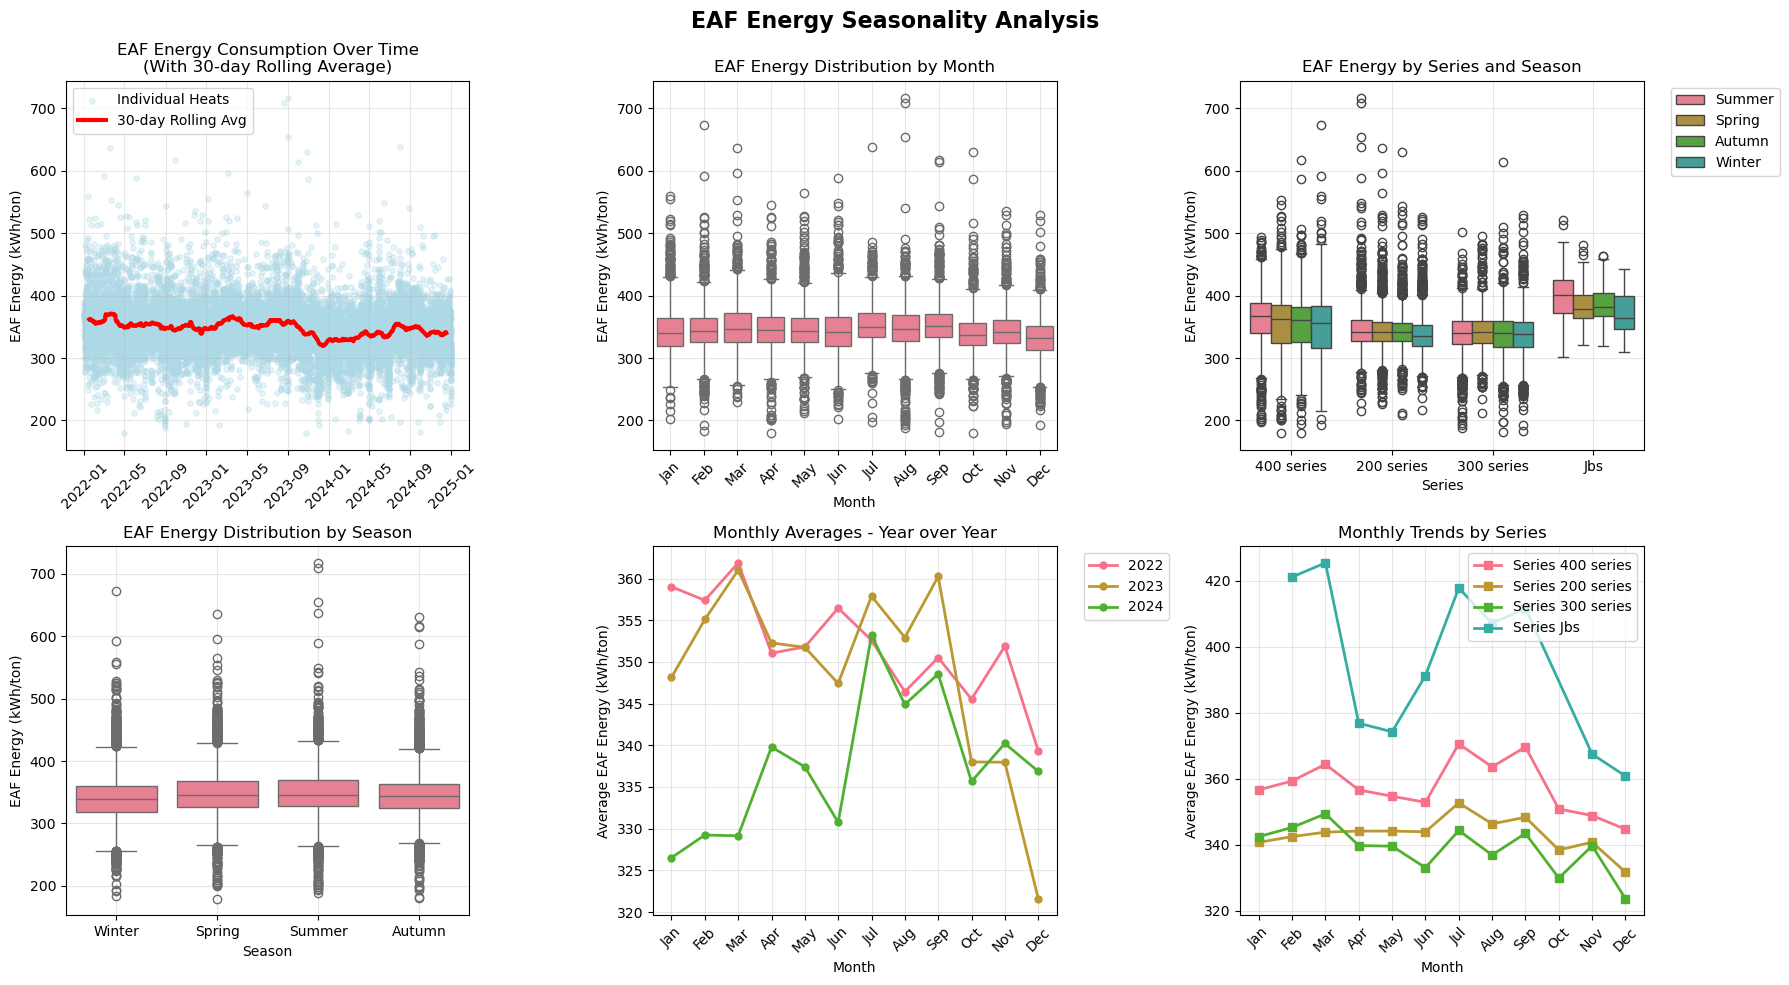

In [5]:
# ACTUALLY CREATE VISUALIZATIONS HERE
if df is not None:
    create_visualizations(df, has_series)
else:
    print("❌ No data to visualize")

In [6]:
def calculate_seasonal_statistics(df):
    """
    Calculate seasonal statistics and differences
    """
    print("\n📊 Calculating seasonal statistics...")
    
    # Overall statistics
    overall_avg = df['kwh_per_ton'].mean()
    overall_std = df['kwh_per_ton'].std()
    
    print(f"Overall EAF Energy: {overall_avg:.1f} ± {overall_std:.1f} kWh/ton")
    
    # Seasonal statistics
    seasonal_stats = df.groupby('season').agg({
        'kwh_per_ton': ['count', 'mean', 'std', 'min', 'max']
    }).round(1)
    
    seasonal_stats.columns = ['Count', 'Mean', 'Std', 'Min', 'Max']
    seasonal_stats = seasonal_stats.reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
    
    print("\n📈 Seasonal EAF Energy Statistics:")
    print(seasonal_stats)
    
    # Key comparisons
    winter_avg = df[df['season'] == 'Winter']['kwh_per_ton'].mean()
    summer_avg = df[df['season'] == 'Summer']['kwh_per_ton'].mean()
    seasonal_swing = winter_avg - summer_avg
    swing_percentage = (seasonal_swing / summer_avg) * 100
    
    print(f"\n🔑 Key Seasonal Comparison:")
    print(f"Winter average: {winter_avg:.1f} kWh/ton")
    print(f"Summer average: {summer_avg:.1f} kWh/ton")
    print(f"Seasonal swing: {seasonal_swing:+.1f} kWh/ton ({swing_percentage:+.1f}%)")
    
    return seasonal_stats, seasonal_swing, swing_percentage

def perform_statistical_tests(df):
    """
    Perform statistical significance tests
    """
    print("\n🔬 Performing statistical tests...")
    
    # Test 1: ANOVA across all seasons
    seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
    season_groups = [df[df['season'] == season]['kwh_per_ton'] for season in seasons]
    
    f_stat, p_value_anova = stats.f_oneway(*season_groups)
    print(f"ANOVA Test (across all seasons):")
    print(f"  F-statistic: {f_stat:.3f}, p-value: {p_value_anova:.4f}")
    
    # Test 2: Winter vs Summer t-test (main comparison)
    winter_data = df[df['season'] == 'Winter']['kwh_per_ton']
    summer_data = df[df['season'] == 'Summer']['kwh_per_ton']
    
    t_stat, p_value_seasonal = stats.ttest_ind(winter_data, summer_data)
    print(f"\nWinter vs Summer t-test:")
    print(f"  t-statistic: {t_stat:.3f}, p-value: {p_value_seasonal:.4f}")
    
    # Interpretation
    print(f"\n📋 Statistical Interpretation:")
    if p_value_seasonal < 0.05:
        winter_avg = winter_data.mean()
        summer_avg = summer_data.mean()
        difference = winter_avg - summer_avg
        percentage = (difference / summer_avg) * 100
        print(f"✅ STATISTICALLY SIGNIFICANT")
        print(f"   Winter uses {difference:.1f} kWh/ton more than Summer ({percentage:+.1f}%)")
        print(f"   Confidence: {100*(1-p_value_seasonal):.1f}% (p = {p_value_seasonal:.4f})")
    else:
        print(f"❌ NOT STATISTICALLY SIGNIFICANT")
        print(f"   No proven seasonal difference (p = {p_value_seasonal:.4f})")
    
    return p_value_seasonal

def analyze_by_series(df, has_series):
    """
    Analyze seasonality patterns by series
    """
    if not has_series:
        return None
    
    print("\n🎯 Analyzing EAF energy patterns by series...")
    
    series_results = []
    
    for series in df['series'].unique():
        series_data = df[df['series'] == series]
        
        if len(series_data) < 10:  # Skip if insufficient data
            continue
            
        winter_avg = series_data[series_data['season'] == 'Winter']['kwh_per_ton'].mean()
        summer_avg = series_data[series_data['season'] == 'Summer']['kwh_per_ton'].mean()
        difference = winter_avg - summer_avg
        percentage = (difference / summer_avg) * 100 if summer_avg > 0 else 0
        
        # Statistical test for this series
        winter_series = series_data[series_data['season'] == 'Winter']['kwh_per_ton']
        summer_series = series_data[series_data['season'] == 'Summer']['kwh_per_ton']
        
        if len(winter_series) > 2 and len(summer_series) > 2:
            t_stat, p_value = stats.ttest_ind(winter_series, summer_series)
            significant = p_value < 0.05
        else:
            p_value = np.nan
            significant = False
        
        series_results.append({
            'Series': series,
            'Count': len(series_data),
            'Winter_Avg': winter_avg,
            'Summer_Avg': summer_avg,
            'Difference': difference,
            'Percentage': percentage,
            'p_value': p_value,
            'Significant': significant
        })
    
    if series_results:
        print("\n📊 Series-wise Seasonal Analysis:")
        print("="*80)
        results_df = pd.DataFrame(series_results)
        display_df = results_df[['Series', 'Count', 'Winter_Avg', 'Summer_Avg', 'Difference', 'Percentage', 'p_value', 'Significant']].copy()
        display_df = display_df.round(2)
        print(display_df.to_string(index=False))
    
    return series_results

def analyze_by_grade(df):
    """
    Analyze seasonality patterns by grade
    """
    print("\n🎯 Analyzing EAF energy patterns by grade...")
    
    # Get top grades by data volume
    grade_counts = df['grade'].value_counts()
    top_grades = grade_counts.head(5).index.tolist()  # Increased to 5 for more coverage
    
    print(f"Top {len(top_grades)} grades by data volume: {top_grades}")
    
    grade_results = []
    
    for grade in top_grades:
        grade_data = df[df['grade'] == grade]
        if len(grade_data) < 10:  # Skip if insufficient data
            continue
            
        winter_avg = grade_data[grade_data['season'] == 'Winter']['kwh_per_ton'].mean()
        summer_avg = grade_data[grade_data['season'] == 'Summer']['kwh_per_ton'].mean()
        difference = winter_avg - summer_avg
        percentage = (difference / summer_avg) * 100 if summer_avg > 0 else 0
        
        # Statistical test for this grade
        winter_grade = grade_data[grade_data['season'] == 'Winter']['kwh_per_ton']
        summer_grade = grade_data[grade_data['season'] == 'Summer']['kwh_per_ton']
        
        if len(winter_grade) > 2 and len(summer_grade) > 2:
            t_stat, p_value = stats.ttest_ind(winter_grade, summer_grade)
            significant = p_value < 0.05
        else:
            p_value = np.nan
            significant = False
        
        grade_results.append({
            'Grade': grade,
            'Count': len(grade_data),
            'Winter_Avg': winter_avg,
            'Summer_Avg': summer_avg,
            'Difference': difference,
            'Percentage': percentage,
            'p_value': p_value,
            'Significant': significant
        })
    
    if grade_results:
        print("\n📊 Grade-wise Seasonal Analysis:")
        print("="*80)
        results_df = pd.DataFrame(grade_results)
        display_df = results_df[['Grade', 'Count', 'Winter_Avg', 'Summer_Avg', 'Difference', 'Percentage', 'p_value', 'Significant']].copy()
        display_df = display_df.round(2)
        print(display_df.to_string(index=False))
    
    return grade_results

print("✅ Analysis functions defined")

✅ Analysis functions defined


In [7]:
# ACTUALLY RUN THE ANALYSIS HERE
if df is not None:
    # Run statistical analysis
    seasonal_stats, seasonal_swing, swing_percentage = calculate_seasonal_statistics(df)
    p_value = perform_statistical_tests(df)
    grade_results = analyze_by_grade(df)
    series_results = analyze_by_series(df, has_series)
    
    print(f"\n✅ Analysis complete!")
else:
    print("❌ No data to analyze")


📊 Calculating seasonal statistics...
Overall EAF Energy: 345.7 ± 39.0 kWh/ton

📈 Seasonal EAF Energy Statistics:
        Count   Mean   Std    Min    Max
season                                  
Winter   4776  341.1  39.2  183.9  672.9
Spring   4404  348.2  38.6  179.5  636.3
Summer   4011  348.7  40.9  187.9  717.4
Autumn   4508  345.2  36.9  180.1  630.0

🔑 Key Seasonal Comparison:
Winter average: 341.1 kWh/ton
Summer average: 348.7 kWh/ton
Seasonal swing: -7.6 kWh/ton (-2.2%)

🔬 Performing statistical tests...
ANOVA Test (across all seasons):
  F-statistic: 36.307, p-value: 0.0000

Winter vs Summer t-test:
  t-statistic: -8.895, p-value: 0.0000

📋 Statistical Interpretation:
✅ STATISTICALLY SIGNIFICANT
   Winter uses -7.6 kWh/ton more than Summer (-2.2%)
   Confidence: 100.0% (p = 0.0000)

🎯 Analyzing EAF energy patterns by grade...
Top 5 grades by data volume: ['JT', '304', 'JSLU DD', 'IRSM44-97', 'J201 (NI - 0.30%, CU 0.70%)']

📊 Grade-wise Seasonal Analysis:
                    


📊 Creating Detailed ECG-like Trend Analysis...


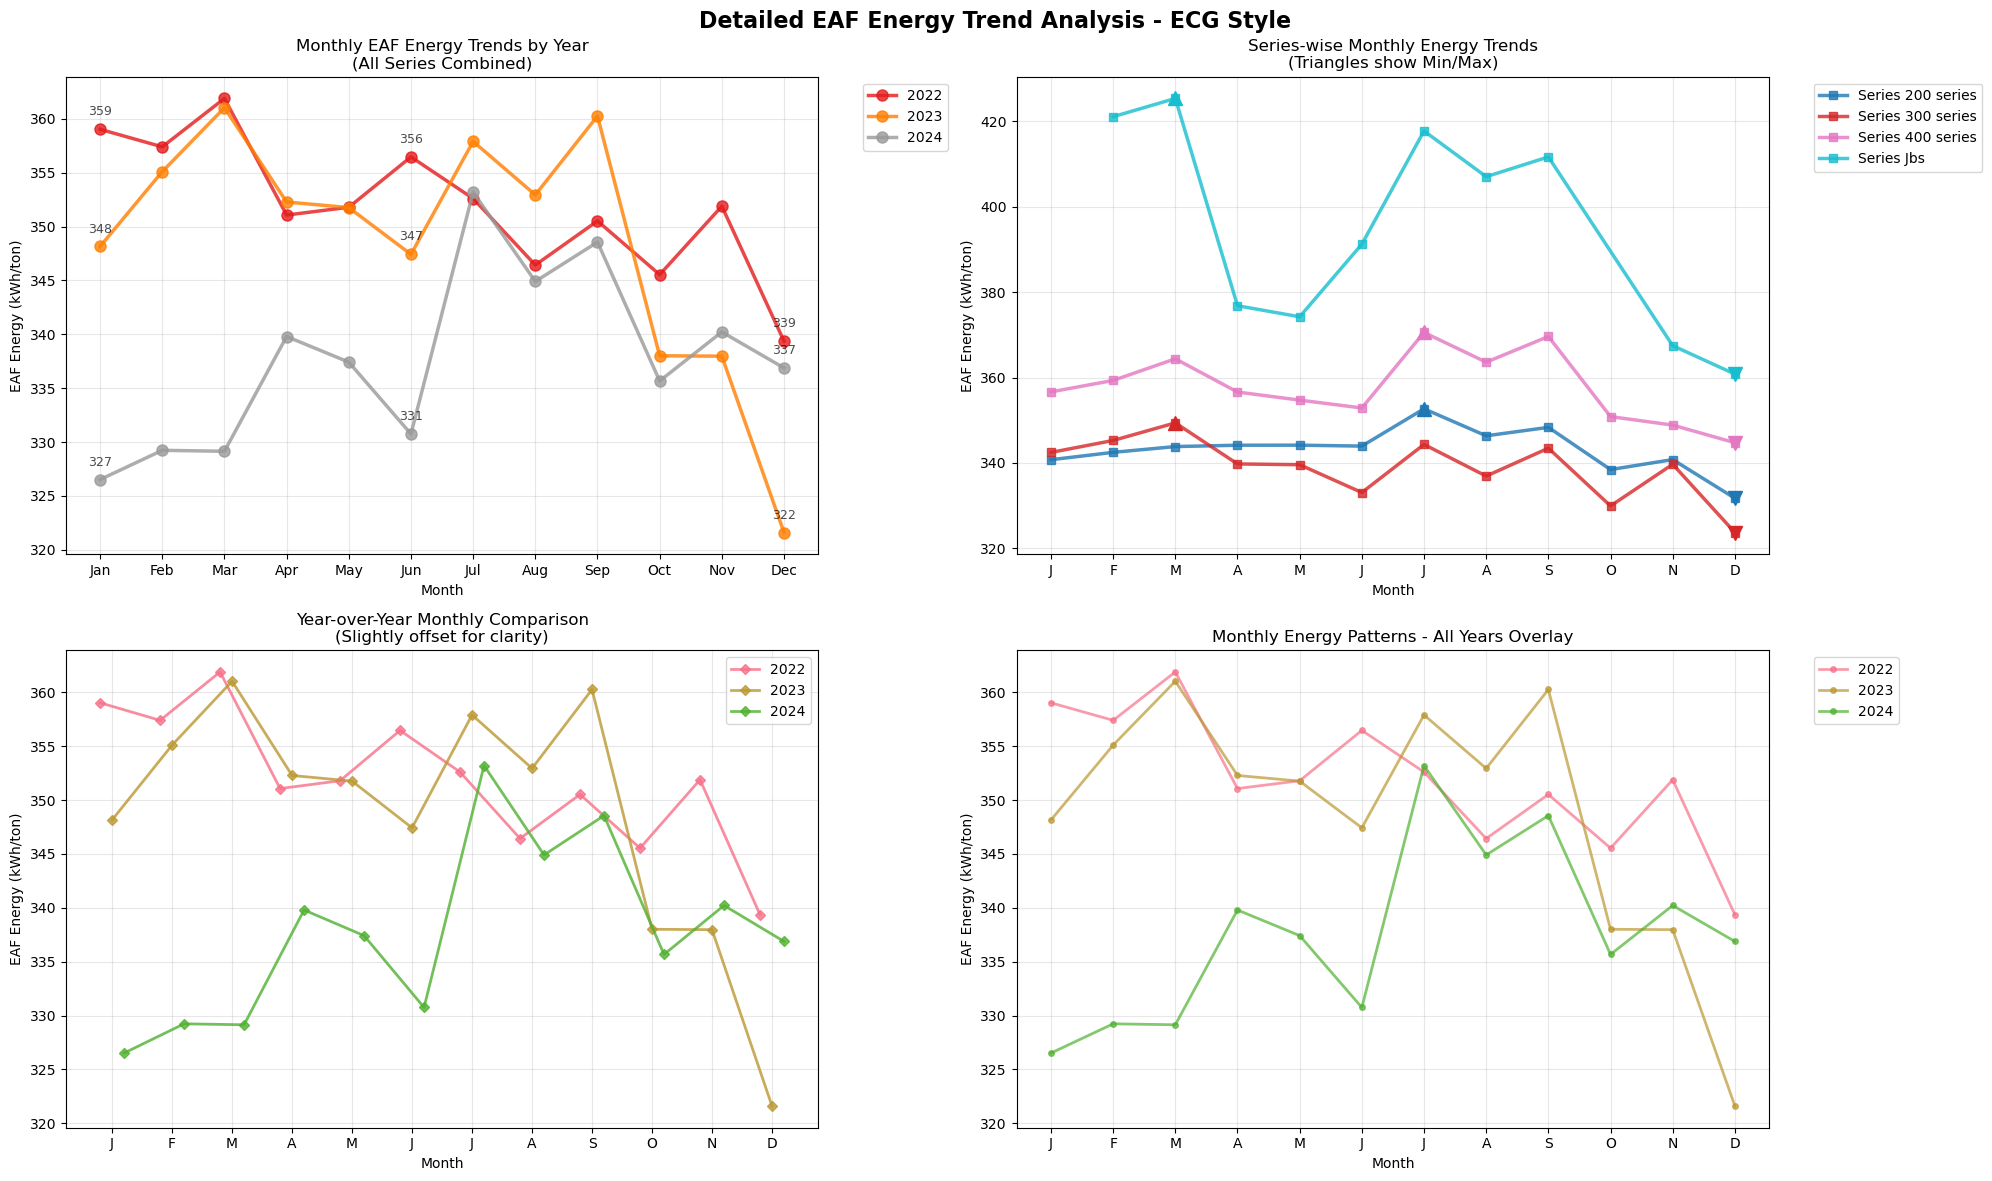


📈 Detailed Trend Statistics:

Monthly Energy Statistics:
      mean   std    min    max
Jan  344.6  39.5  202.3  558.9
Feb  347.4  41.2  183.9  672.9
Mar  351.1  40.7  229.9  636.3
Apr  347.3  38.0  179.5  545.1
May  346.5  37.2  211.9  564.7
Jun  344.6  42.9  202.6  589.1
Jul  354.6  35.3  197.6  637.5
Aug  348.0  42.5  187.9  717.4
Sep  352.8  37.9  182.1  617.0
Oct  339.1  34.6  180.1  630.0
Nov  343.2  36.7  194.1  536.3
Dec  332.6  35.5  192.3  528.8

🌡️  Seasonal Amplitude (Winter - Summer): -7.6 kWh/ton

📊 Series-wise Energy Ranking (Annual Average):
   Series Jbs: 389.1 kWh/ton
   Series 400 series: 357.5 kWh/ton
   Series 200 series: 342.6 kWh/ton
   Series 300 series: 338.8 kWh/ton


In [8]:
def create_detailed_trend_analysis(df, has_series):
    """
    Create detailed ECG-like trend plots showing monthly variations
    without averaging across years
    """
    print("\n📊 Creating Detailed ECG-like Trend Analysis...")
    
    # Create a large figure for detailed analysis
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    fig.suptitle('Detailed EAF Energy Trend Analysis - ECG Style', fontsize=16, fontweight='bold')
    
    # Plot 1: Monthly Trends by Year (All Data)
    ax1 = axes[0, 0]
    
    # Get unique years and create color map
    years = sorted(df['year'].unique())
    colors = plt.cm.Set1(np.linspace(0, 1, len(years)))
    
    for i, year in enumerate(years):
        year_data = df[df['year'] == year]
        monthly_avg = year_data.groupby('month')['kwh_per_ton'].mean()
        
        # Plot with markers and lines
        ax1.plot(monthly_avg.index, monthly_avg.values, 
                marker='o', linewidth=2.5, markersize=8, 
                color=colors[i], label=f'{year}', alpha=0.8)
        
        # Add data point labels for key months
        for month, value in monthly_avg.items():
            if month in [1, 6, 12]:  # Jan, Jun, Dec for key points
                ax1.annotate(f'{value:.0f}', 
                           (month, value), 
                           textcoords="offset points", 
                           xytext=(0,10), 
                           ha='center', 
                           fontsize=9,
                           alpha=0.7)
    
    ax1.set_xlabel('Month')
    ax1.set_ylabel('EAF Energy (kWh/ton)')
    ax1.set_title('Monthly EAF Energy Trends by Year\n(All Series Combined)')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Plot 2: Series-wise Monthly Trends (if series data available)
    if has_series and df['series'].nunique() <= 6:  # Only if reasonable number of series
        ax2 = axes[0, 1]
        
        series_list = sorted(df['series'].unique())
        colors_series = plt.cm.tab10(np.linspace(0, 1, len(series_list)))
        
        for i, series in enumerate(series_list):
            series_data = df[df['series'] == series]
            monthly_avg = series_data.groupby('month')['kwh_per_ton'].mean()
            
            ax2.plot(monthly_avg.index, monthly_avg.values,
                    marker='s', linewidth=2.5, markersize=6,
                    color=colors_series[i], label=f'Series {series}', alpha=0.8)
            
            # Add min/max markers
            min_month = monthly_avg.idxmin()
            max_month = monthly_avg.idxmax()
            ax2.plot(min_month, monthly_avg[min_month], 'v', color=colors_series[i], markersize=10)
            ax2.plot(max_month, monthly_avg[max_month], '^', color=colors_series[i], markersize=10)
        
        ax2.set_xlabel('Month')
        ax2.set_ylabel('EAF Energy (kWh/ton)')
        ax2.set_title('Series-wise Monthly Energy Trends\n(Triangles show Min/Max)')
        ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax2.grid(True, alpha=0.3)
        ax2.set_xticks(range(1, 13))
        ax2.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
    
    else:
        # Alternative: Yearly comparison for top grades
        ax2 = axes[0, 1]
        top_grades = df['grade'].value_counts().head(3).index
        
        for grade in top_grades:
            grade_data = df[df['grade'] == grade]
            monthly_avg = grade_data.groupby('month')['kwh_per_ton'].mean()
            
            ax2.plot(monthly_avg.index, monthly_avg.values,
                    marker='^', linewidth=2, markersize=6,
                    label=f'Grade {grade}', alpha=0.7)
        
        ax2.set_xlabel('Month')
        ax2.set_ylabel('EAF Energy (kWh/ton)')
        ax2.set_title('Grade-wise Monthly Energy Trends')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.set_xticks(range(1, 13))
        ax2.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
    
    # Plot 3: Year-by-Year Comparison (Facet Style)
    ax3 = axes[1, 0]
    
    # Create subplots within subplot for year comparison
    if len(years) <= 3:
        for i, year in enumerate(years):
            year_data = df[df['year'] == year]
            monthly_avg = year_data.groupby('month')['kwh_per_ton'].mean()
            
            # Offset each year slightly for clarity
            x_offset = i * 0.2 - 0.2
            ax3.plot(np.array(monthly_avg.index) + x_offset, monthly_avg.values,
                    marker='D', linewidth=2, markersize=5,
                    label=f'{year}', alpha=0.8)
        
        ax3.set_xlabel('Month')
        ax3.set_ylabel('EAF Energy (kWh/ton)')
        ax3.set_title('Year-over-Year Monthly Comparison\n(Slightly offset for clarity)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_xticks(range(1, 13))
        ax3.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
    
    else:
        # For more years, show seasonal patterns
        seasonal_avg = df.groupby(['year', 'season'])['kwh_per_ton'].mean().unstack()
        seasonal_avg = seasonal_avg[['Winter', 'Spring', 'Summer', 'Autumn']]
        
        seasonal_avg.plot(kind='line', marker='o', ax=ax3, linewidth=2, markersize=6)
        ax3.set_xlabel('Year')
        ax3.set_ylabel('EAF Energy (kWh/ton)')
        ax3.set_title('Seasonal Energy Patterns by Year')
        ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax3.grid(True, alpha=0.3)
    
    # Plot 4: Heatmap-style Monthly View
    ax4 = axes[1, 1]
    
    # Create pivot table for heatmap
    monthly_year_data = df.groupby(['year', 'month'])['kwh_per_ton'].mean().unstack()
    
    # Plot as lines with filled areas
    for year in monthly_year_data.index:
        monthly_values = monthly_year_data.loc[year]
        ax4.plot(monthly_values.index, monthly_values.values,
                linewidth=2, marker='o', markersize=4,
                label=f'{year}', alpha=0.7)
        
        # Fill between lines for visual emphasis
        if year != monthly_year_data.index[-1]:
            next_year = monthly_year_data.index[monthly_year_data.index.get_loc(year) + 1]
            next_values = monthly_year_data.loc[next_year]
            # ax4.fill_between(monthly_values.index, monthly_values.values, next_values.values, alpha=0.1)
    
    ax4.set_xlabel('Month')
    ax4.set_ylabel('EAF Energy (kWh/ton)')
    ax4.set_title('Monthly Energy Patterns - All Years Overlay')
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax4.grid(True, alpha=0.3)
    ax4.set_xticks(range(1, 13))
    ax4.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\n📈 Detailed Trend Statistics:")
    print("="*50)
    
    # Monthly statistics
    monthly_stats = df.groupby('month')['kwh_per_ton'].agg(['mean', 'std', 'min', 'max']).round(1)
    monthly_stats.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    print("\nMonthly Energy Statistics:")
    print(monthly_stats)
    
    # Seasonal amplitude
    winter_avg = df[df['season'] == 'Winter']['kwh_per_ton'].mean()
    summer_avg = df[df['season'] == 'Summer']['kwh_per_ton'].mean()
    amplitude = winter_avg - summer_avg
    print(f"\n🌡️  Seasonal Amplitude (Winter - Summer): {amplitude:.1f} kWh/ton")
    
    if has_series:
        print(f"\n📊 Series-wise Energy Ranking (Annual Average):")
        series_ranking = df.groupby('series')['kwh_per_ton'].mean().sort_values(ascending=False)
        for series, energy in series_ranking.items():
            print(f"   Series {series}: {energy:.1f} kWh/ton")

# Run the detailed analysis
if df is not None:
    create_detailed_trend_analysis(df, has_series)
else:
    print("❌ No data for detailed analysis")


🔬 Creating Ultra-Detailed Series Analysis...


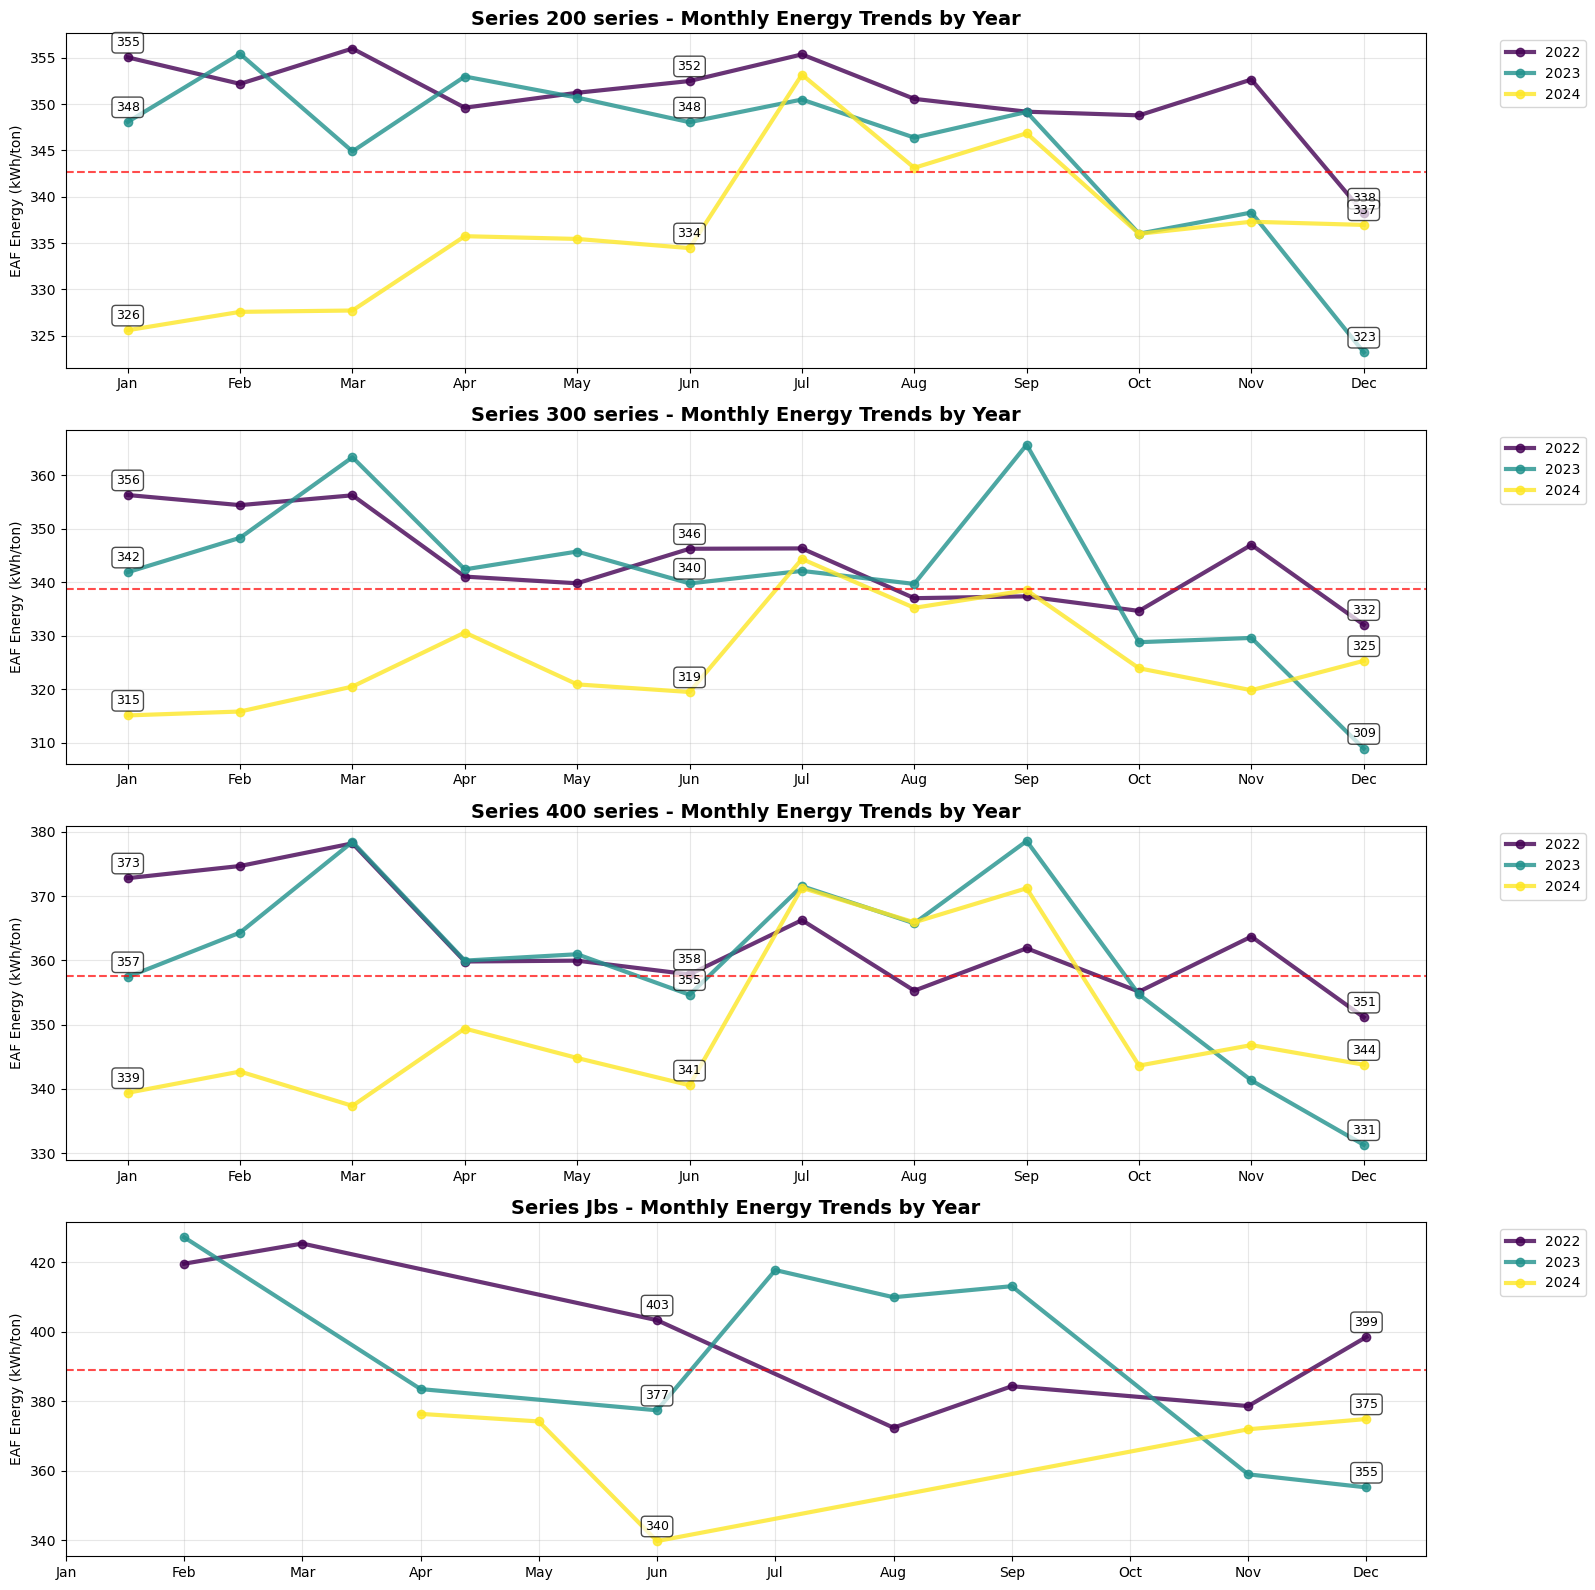


📋 Comprehensive Series Analysis:

Series 200 series:
  2022: 350.8 kWh/ton
  2023: 342.9 kWh/ton
  2024: 336.4 kWh/ton
  Seasonal swing (Winter-Summer): -9.1 kWh/ton

Series 300 series:
  2022: 344.7 kWh/ton
  2023: 340.1 kWh/ton
  2024: 328.7 kWh/ton
  Seasonal swing (Winter-Summer): -1.3 kWh/ton

Series 400 series:
  2022: 362.4 kWh/ton
  2023: 361.1 kWh/ton
  2024: 349.0 kWh/ton
  Seasonal swing (Winter-Summer): -8.5 kWh/ton

Series Jbs:
  2022: 407.1 kWh/ton
  2023: 392.1 kWh/ton
  2024: 370.0 kWh/ton
  Seasonal swing (Winter-Summer): -28.3 kWh/ton


In [9]:
def create_ultra_detailed_series_analysis(df, has_series):
    """
    Create ultra-detailed analysis showing each series for each year separately
    """
    if not has_series:
        print("❌ No series data for detailed analysis")
        return
    
    print("\n🔬 Creating Ultra-Detailed Series Analysis...")
    
    series_list = sorted(df['series'].unique())
    years = sorted(df['year'].unique())
    
    # Create a figure with subplots for each series
    n_series = len(series_list)
    fig, axes = plt.subplots(n_series, 1, figsize=(16, 4 * n_series))
    
    # If only one series, make axes a list
    if n_series == 1:
        axes = [axes]
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
    
    for idx, series in enumerate(series_list):
        ax = axes[idx]
        series_data = df[df['series'] == series]
        
        # Plot each year separately
        for i, year in enumerate(years):
            year_series_data = series_data[series_data['year'] == year]
            if len(year_series_data) > 0:
                monthly_avg = year_series_data.groupby('month')['kwh_per_ton'].mean()
                
                # Plot with thick lines for ECG-like appearance
                ax.plot(monthly_avg.index, monthly_avg.values,
                       linewidth=3, marker='o', markersize=6,
                       color=colors[i], label=f'{year}', alpha=0.8)
                
                # Add value annotations for key points
                for month in [1, 6, 12]:  # Jan, Jun, Dec
                    if month in monthly_avg.index:
                        value = monthly_avg[month]
                        ax.annotate(f'{value:.0f}', 
                                  (month, value),
                                  textcoords="offset points",
                                  xytext=(0, 8),
                                  ha='center',
                                  fontsize=9,
                                  bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.7))
        
        ax.set_title(f'Series {series} - Monthly Energy Trends by Year', fontsize=14, fontweight='bold')
        ax.set_ylabel('EAF Energy (kWh/ton)')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(1, 13))
        ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        
        # Add some statistics to the plot
        overall_avg = series_data['kwh_per_ton'].mean()
        ax.axhline(y=overall_avg, color='red', linestyle='--', alpha=0.7, label=f'Avg: {overall_avg:.1f}')
    
    plt.tight_layout()
    plt.show()
    
    # Print comprehensive comparison
    print(f"\n📋 Comprehensive Series Analysis:")
    print("="*60)
    
    for series in series_list:
        series_data = df[df['series'] == series]
        print(f"\nSeries {series}:")
        
        # Yearly averages
        yearly_avg = series_data.groupby('year')['kwh_per_ton'].mean()
        for year, avg in yearly_avg.items():
            print(f"  {year}: {avg:.1f} kWh/ton")
        
        # Seasonal pattern
        seasonal_avg = series_data.groupby('season')['kwh_per_ton'].mean()
        winter_summer_diff = seasonal_avg.get('Winter', 0) - seasonal_avg.get('Summer', 0)
        print(f"  Seasonal swing (Winter-Summer): {winter_summer_diff:+.1f} kWh/ton")

# Run ultra-detailed analysis
if df is not None and has_series:
    create_ultra_detailed_series_analysis(df, has_series)


📊 Creating Clean 36-Month Trends for Top Grades...
📈 Analyzing top 10 grades: ['JT', '304', 'JSLU DD', 'IRSM44-97', 'J201 (NI - 0.30%, CU 0.70%)', '316L', 'JSLU SD-M', '301 (1.4310)', '204CU', '430 RF-3']


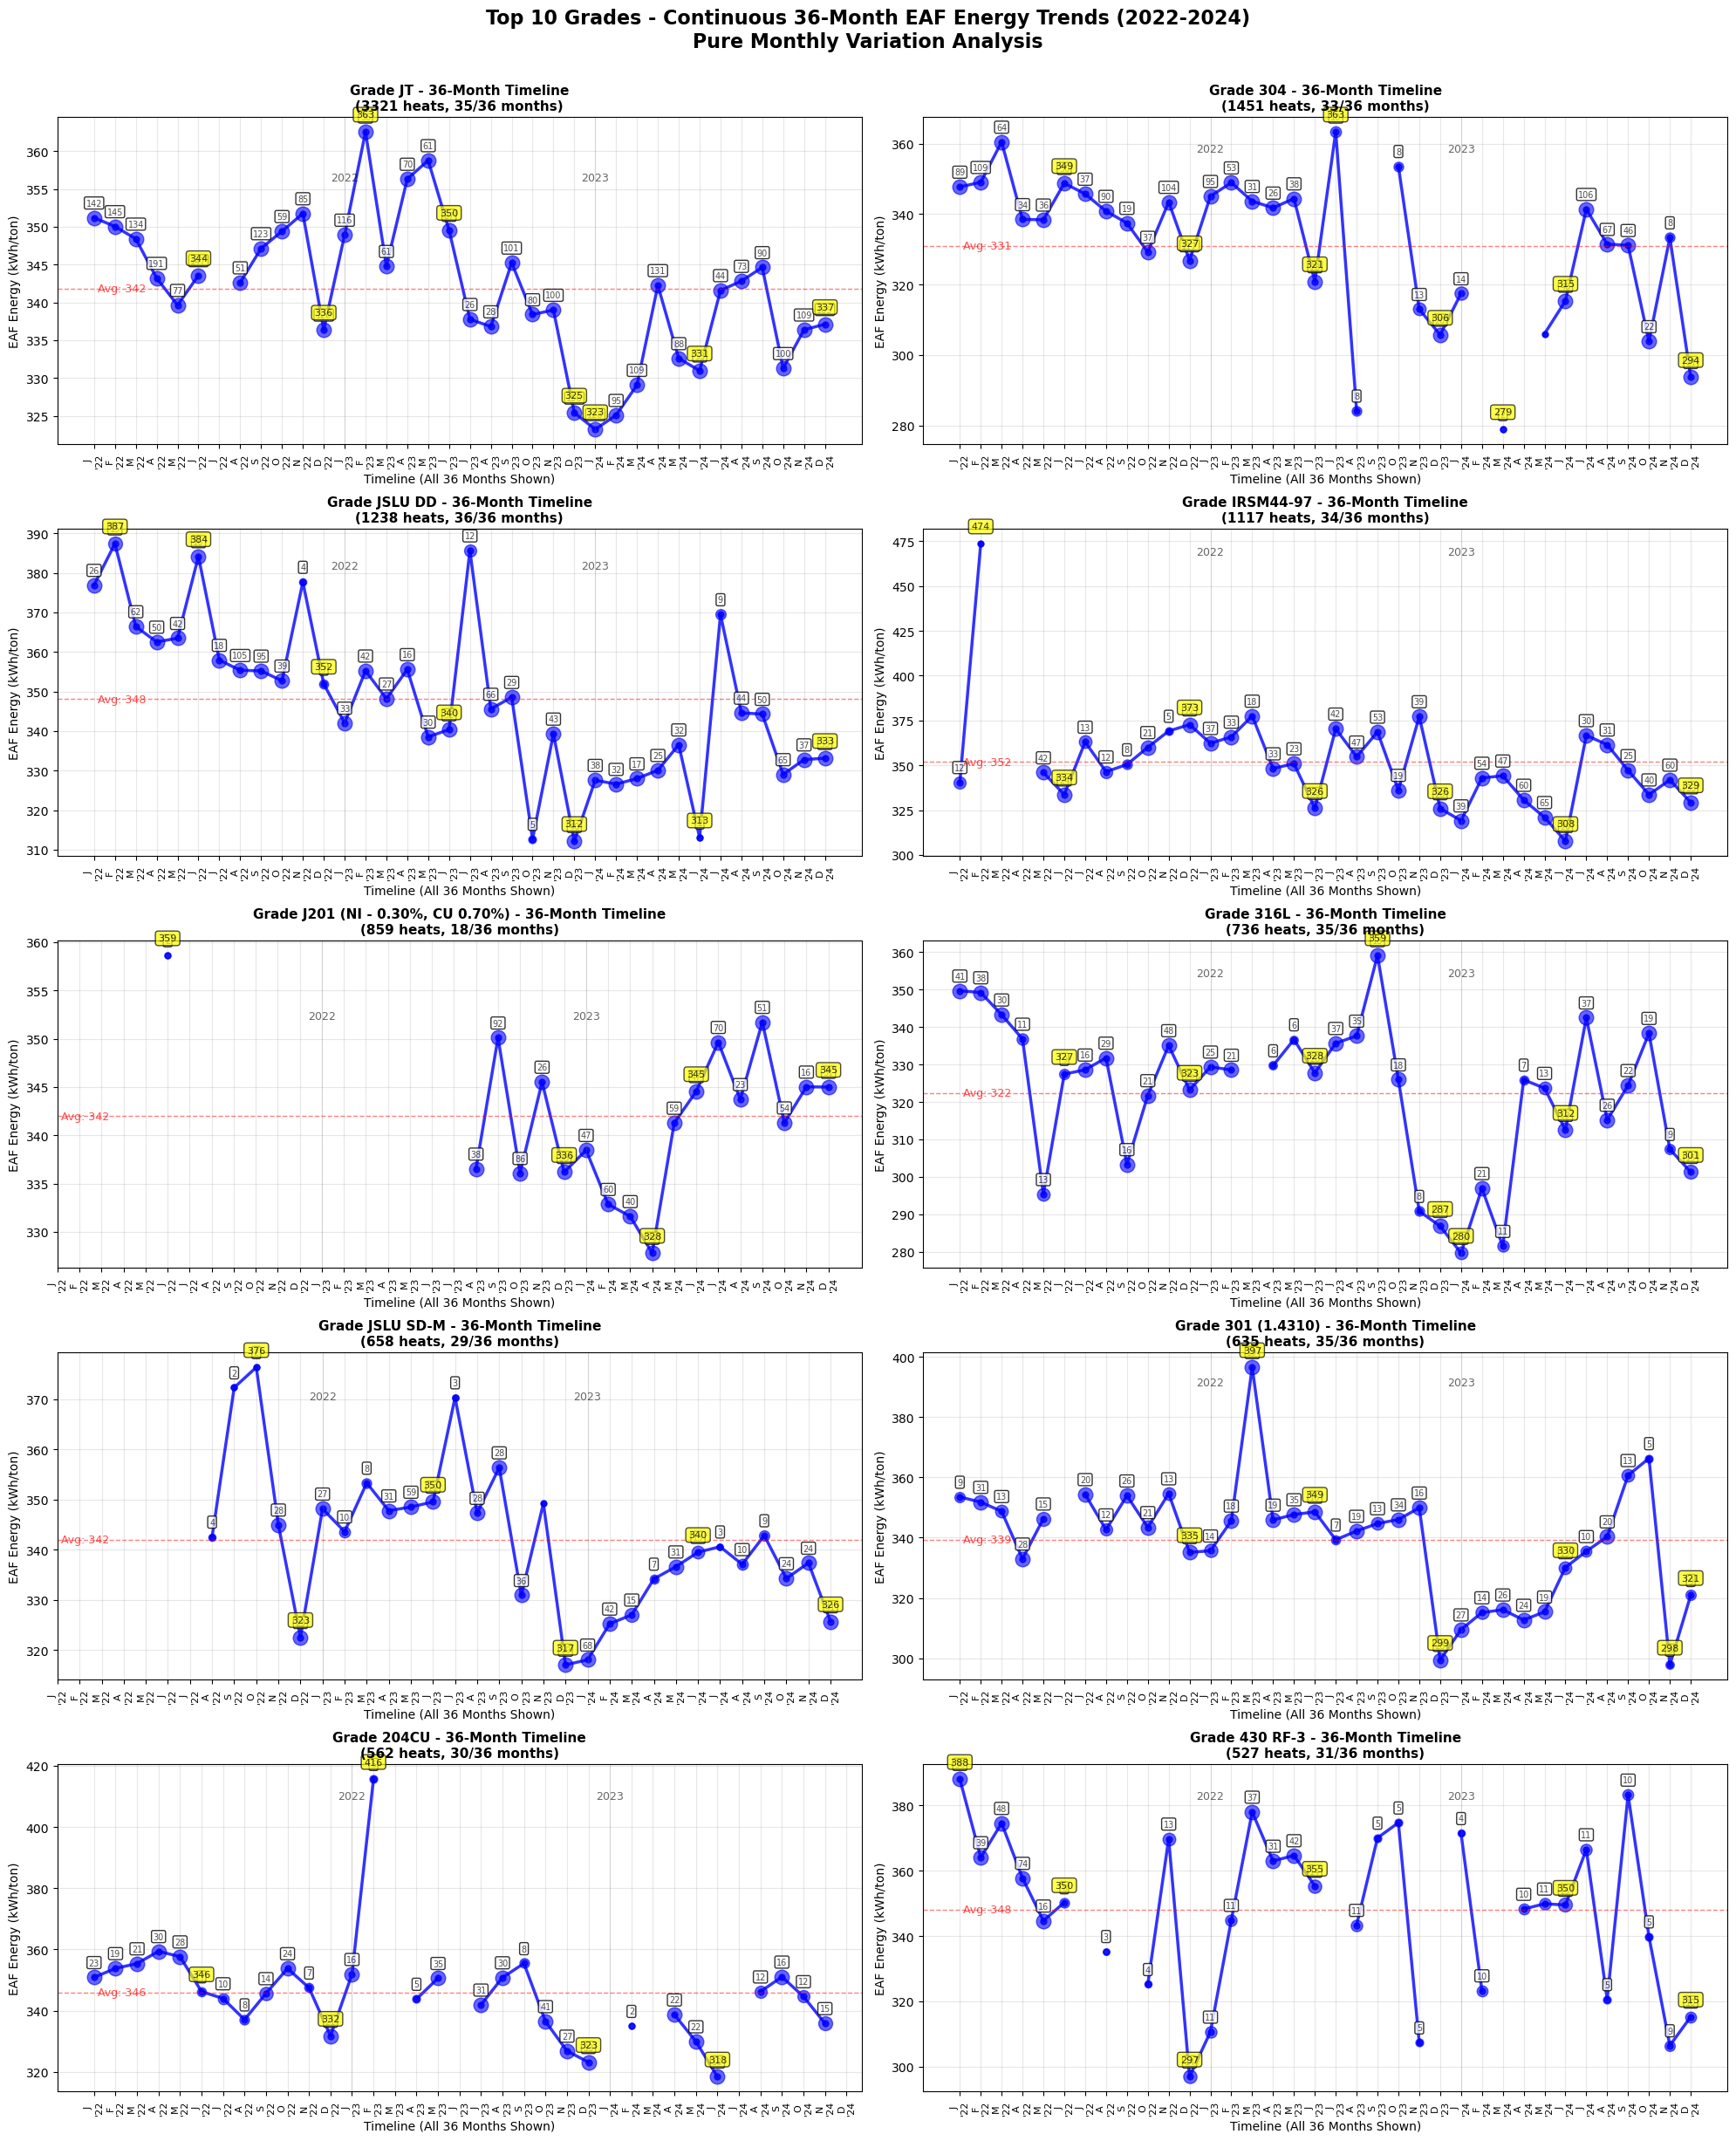

In [10]:
def create_clean_36month_trends(df):
    """
    Create clean 36-month timeline for top grades showing all months clearly
    No seasonal markings - just pure monthly variation
    """
    print("\n📊 Creating Clean 36-Month Trends for Top Grades...")
    
    # Get top 10 grades by data volume
    top_grades = df['grade'].value_counts().head(10).index.tolist()
    print(f"📈 Analyzing top {len(top_grades)} grades: {top_grades}")
    
    # Create a large figure for detailed analysis
    n_grades = len(top_grades)
    n_cols = 2  # 2 columns for wider plots
    n_rows = (n_grades + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    fig.suptitle('Top 10 Grades - Continuous 36-Month EAF Energy Trends (2022-2024)\nPure Monthly Variation Analysis', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    # Flatten axes array for easy iteration
    if n_grades > 1:
        axes_flat = axes.flatten()
    else:
        axes_flat = [axes]
    
    # Create detailed month labels for all 36 months
    month_labels = []
    month_names = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
    for i in range(36):
        year = 2022 + (i // 12)
        month = (i % 12)
        month_labels.append(f"{month_names[month]}\n'{str(year)[-2:]}")
    
    for idx, grade in enumerate(top_grades):
        if idx >= len(axes_flat):
            break
            
        ax = axes_flat[idx]
        grade_data = df[df['grade'] == grade].copy()
        
        # Check if we have data for this grade
        if len(grade_data) == 0:
            ax.text(0.5, 0.5, f'No data for\nGrade {grade}', 
                   ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title(f'Grade {grade}', fontsize=12, fontweight='bold')
            continue
        
        # Create continuous timeline data
        timeline_data = []
        data_points_per_month = []  # Track how many data points per month
        
        for year in [2022, 2023, 2024]:
            for month in range(1, 13):
                month_data = grade_data[(grade_data['year'] == year) & (grade_data['month'] == month)]
                if len(month_data) > 0:
                    avg_energy = month_data['kwh_per_ton'].mean()
                    timeline_data.append(avg_energy)
                    data_points_per_month.append(len(month_data))
                else:
                    timeline_data.append(np.nan)
                    data_points_per_month.append(0)
        
        # Plot the continuous 36-month timeline
        months = list(range(1, 37))
        line = ax.plot(months, timeline_data, 
                      linewidth=2.5, 
                      marker='o', 
                      markersize=5,
                      color='blue',
                      alpha=0.8,
                      label='Monthly Energy')
        
        # Add data point size indication (larger markers for more data points)
        for i, (month, energy, count) in enumerate(zip(months, timeline_data, data_points_per_month)):
            if not np.isnan(energy) and count > 0:
                marker_size = 4 + min(count / 2, 8)  # Scale marker size with data point count
                ax.plot(month, energy, 'o', 
                       markersize=marker_size,
                       color='blue',
                       alpha=0.6)
                
                # Add data point count for months with multiple heats
                if count > 1:
                    ax.annotate(f'{count}', 
                              (month, energy),
                              textcoords="offset points",
                              xytext=(0, 10),
                              ha='center',
                              fontsize=7,
                              alpha=0.7,
                              bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))
        
        # Add value labels for key points (min, max, and every 6 months)
        if not all(np.isnan(timeline_data)):
            valid_data = [(m, e) for m, e in zip(months, timeline_data) if not np.isnan(e)]
            if valid_data:
                energies = [e for m, e in valid_data]
                min_energy = min(energies)
                max_energy = max(energies)
                
                for month, energy in valid_data:
                    if energy in [min_energy, max_energy] or month % 6 == 0:  # Min, max, and every 6 months
                        ax.annotate(f'{energy:.0f}', 
                                  (month, energy),
                                  textcoords="offset points",
                                  xytext=(0, 12),
                                  ha='center',
                                  fontsize=8,
                                  alpha=0.8,
                                  bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))
        
        # Customize the subplot
        total_heats = len(grade_data)
        data_coverage = sum(1 for x in timeline_data if not np.isnan(x))
        
        ax.set_title(f'Grade {grade} - 36-Month Timeline\n({total_heats} heats, {data_coverage}/36 months)', 
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Timeline (All 36 Months Shown)')
        ax.set_ylabel('EAF Energy (kWh/ton)')
        ax.grid(True, alpha=0.3)
        
        # Show ALL 36 months on x-axis
        ax.set_xticks(range(1, 37))
        ax.set_xticklabels(month_labels, rotation=90, fontsize=8)
        
        # Add year separators with subtle styling
        for year_marker in [13, 25]:
            ax.axvline(x=year_marker, color='gray', linestyle='-', alpha=0.3, linewidth=0.5)
            ax.text(year_marker, ax.get_ylim()[1] * 0.98, f"202{year_marker//12 + 1}", 
                   ha='center', va='top', fontsize=9, alpha=0.6)
        
        # Add some statistics to the plot
        valid_energies = [e for e in timeline_data if not np.isnan(e)]
        if valid_energies:
            avg_energy = np.mean(valid_energies)
            ax.axhline(y=avg_energy, color='red', linestyle='--', alpha=0.5, linewidth=1)
            ax.text(1, avg_energy, f' Avg: {avg_energy:.0f}', 
                   va='center', fontsize=9, color='red', alpha=0.7)
    
    # Hide empty subplots
    for idx in range(len(top_grades), len(axes_flat)):
        axes_flat[idx].set_visible(False)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    return top_grades

# Run the clean 36-month analysis
if df is not None:
    top_grades = create_clean_36month_trends(df)
else:
    print("❌ No data for continuous timeline analysis")

In [11]:
def analyze_monthly_variation_patterns(df, top_grades):
    """
    Analyze pure monthly variation patterns without seasonal assumptions
    """
    print("\n📈 Analyzing Pure Monthly Variation Patterns...")
    print("="*80)
    
    variation_results = []
    
    for grade in top_grades:
        grade_data = df[df['grade'] == grade].copy()
        
        if len(grade_data) < 12:  # Need at least 1 year of data
            continue
        
        # Create monthly averages across all years
        monthly_patterns = {}
        monthly_std = {}
        
        for month in range(1, 13):
            month_data = grade_data[grade_data['month'] == month]['kwh_per_ton']
            if len(month_data) > 0:
                monthly_patterns[month] = month_data.mean()
                monthly_std[month] = month_data.std()
        
        if len(monthly_patterns) < 6:  # Need at least 6 months of data
            continue
        
        # Calculate variation metrics
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        
        energies = list(monthly_patterns.values())
        avg_energy = np.mean(energies)
        max_energy = max(energies)
        min_energy = min(energies)
        variation_range = max_energy - min_energy
        variation_percentage = (variation_range / avg_energy) * 100
        
        # Find peak and trough months
        peak_month = max(monthly_patterns, key=monthly_patterns.get)
        trough_month = min(monthly_patterns, key=monthly_patterns.get)
        
        # Pattern classification based on variation
        if variation_range > 20:
            variation_strength = "HIGH VARIATION"
        elif variation_range > 10:
            variation_strength = "MODERATE VARIATION" 
        else:
            variation_strength = "LOW VARIATION"
        
        # Check for consistent patterns across years
        year_consistency = []
        for year in [2022, 2023, 2024]:
            year_data = grade_data[grade_data['year'] == year]
            if len(year_data) >= 6:  # At least 6 months of data
                year_avg = year_data['kwh_per_ton'].mean()
                year_consistency.append(year_avg)
        
        consistency_score = np.std(year_consistency) / np.mean(year_consistency) * 100 if len(year_consistency) > 1 else 100
        
        variation_info = {
            'Grade': grade,
            'Data_Months': len(monthly_patterns),
            'Avg_Energy': avg_energy,
            'Variation_Range': variation_range,
            'Variation_Percentage': variation_percentage,
            'Variation_Strength': variation_strength,
            'Peak_Month': month_names[peak_month-1],
            'Trough_Month': month_names[trough_month-1],
            'Peak_Trough_Difference': monthly_patterns[peak_month] - monthly_patterns[trough_month],
            'Year_Consistency': consistency_score
        }
        
        variation_results.append(variation_info)
        
        # Print detailed analysis
        print(f"\n🔍 Grade {grade}:")
        print(f"   📊 Coverage: {variation_info['Data_Months']}/12 months, Avg: {variation_info['Avg_Energy']:.1f} kWh/ton")
        print(f"   📈 {variation_info['Variation_Strength']}: {variation_info['Variation_Range']:.1f} kWh/ton range ({variation_info['Variation_Percentage']:.1f}%)")
        print(f"   🎯 Pattern: Peak in {variation_info['Peak_Month']}, Trough in {variation_info['Trough_Month']}")
        print(f"   📐 Peak-Trough Difference: {variation_info['Peak_Trough_Difference']:.1f} kWh/ton")
        print(f"   🔄 Year Consistency: {variation_info['Year_Consistency']:.1f}% (lower = more consistent)")
        
        # Print monthly pattern
        print(f"   📅 Monthly Pattern: ", end="")
        monthly_values = []
        for month in range(1, 13):
            if month in monthly_patterns:
                monthly_values.append(f"{month_names[month-1]}:{monthly_patterns[month]:.0f}")
        print(", ".join(monthly_values))
    
    return variation_results

# Run monthly variation analysis
if df is not None and 'top_grades' in locals():
    variation_results = analyze_monthly_variation_patterns(df, top_grades)


📈 Analyzing Pure Monthly Variation Patterns...

🔍 Grade JT:
   📊 Coverage: 12/12 months, Avg: 341.2 kWh/ton
   📈 MODERATE VARIATION: 13.7 kWh/ton range (4.0%)
   🎯 Pattern: Peak in Sep, Trough in Dec
   📐 Peak-Trough Difference: 13.7 kWh/ton
   🔄 Year Consistency: 1.5% (lower = more consistent)
   📅 Monthly Pattern: Jan:341, Feb:343, Mar:341, Apr:345, May:342, Jun:343, Jul:340, Aug:342, Sep:346, Oct:338, Nov:342, Dec:332

🔍 Grade 304:
   📊 Coverage: 12/12 months, Avg: 337.7 kWh/ton
   📈 HIGH VARIATION: 33.7 kWh/ton range (10.0%)
   🎯 Pattern: Peak in Mar, Trough in Dec
   📐 Peak-Trough Difference: 33.7 kWh/ton
   🔄 Year Consistency: 1.9% (lower = more consistent)
   📅 Monthly Pattern: Jan:344, Feb:349, Mar:353, Apr:340, May:341, Jun:330, Jul:344, Aug:334, Sep:333, Oct:324, Nov:340, Dec:320

🔍 Grade JSLU DD:
   📊 Coverage: 12/12 months, Avg: 347.9 kWh/ton
   📈 HIGH VARIATION: 44.8 kWh/ton range (12.9%)
   🎯 Pattern: Peak in Jul, Trough in Dec
   📐 Peak-Trough Difference: 44.8 kWh/ton
 


🎯 Visualizing High Monthly Variation Patterns...
🎯 Grades with significant monthly variation: ['JT', '304', 'JSLU DD', 'IRSM44-97', 'J201 (NI - 0.30%, CU 0.70%)', '316L', 'JSLU SD-M', '301 (1.4310)', '204CU', '430 RF-3']


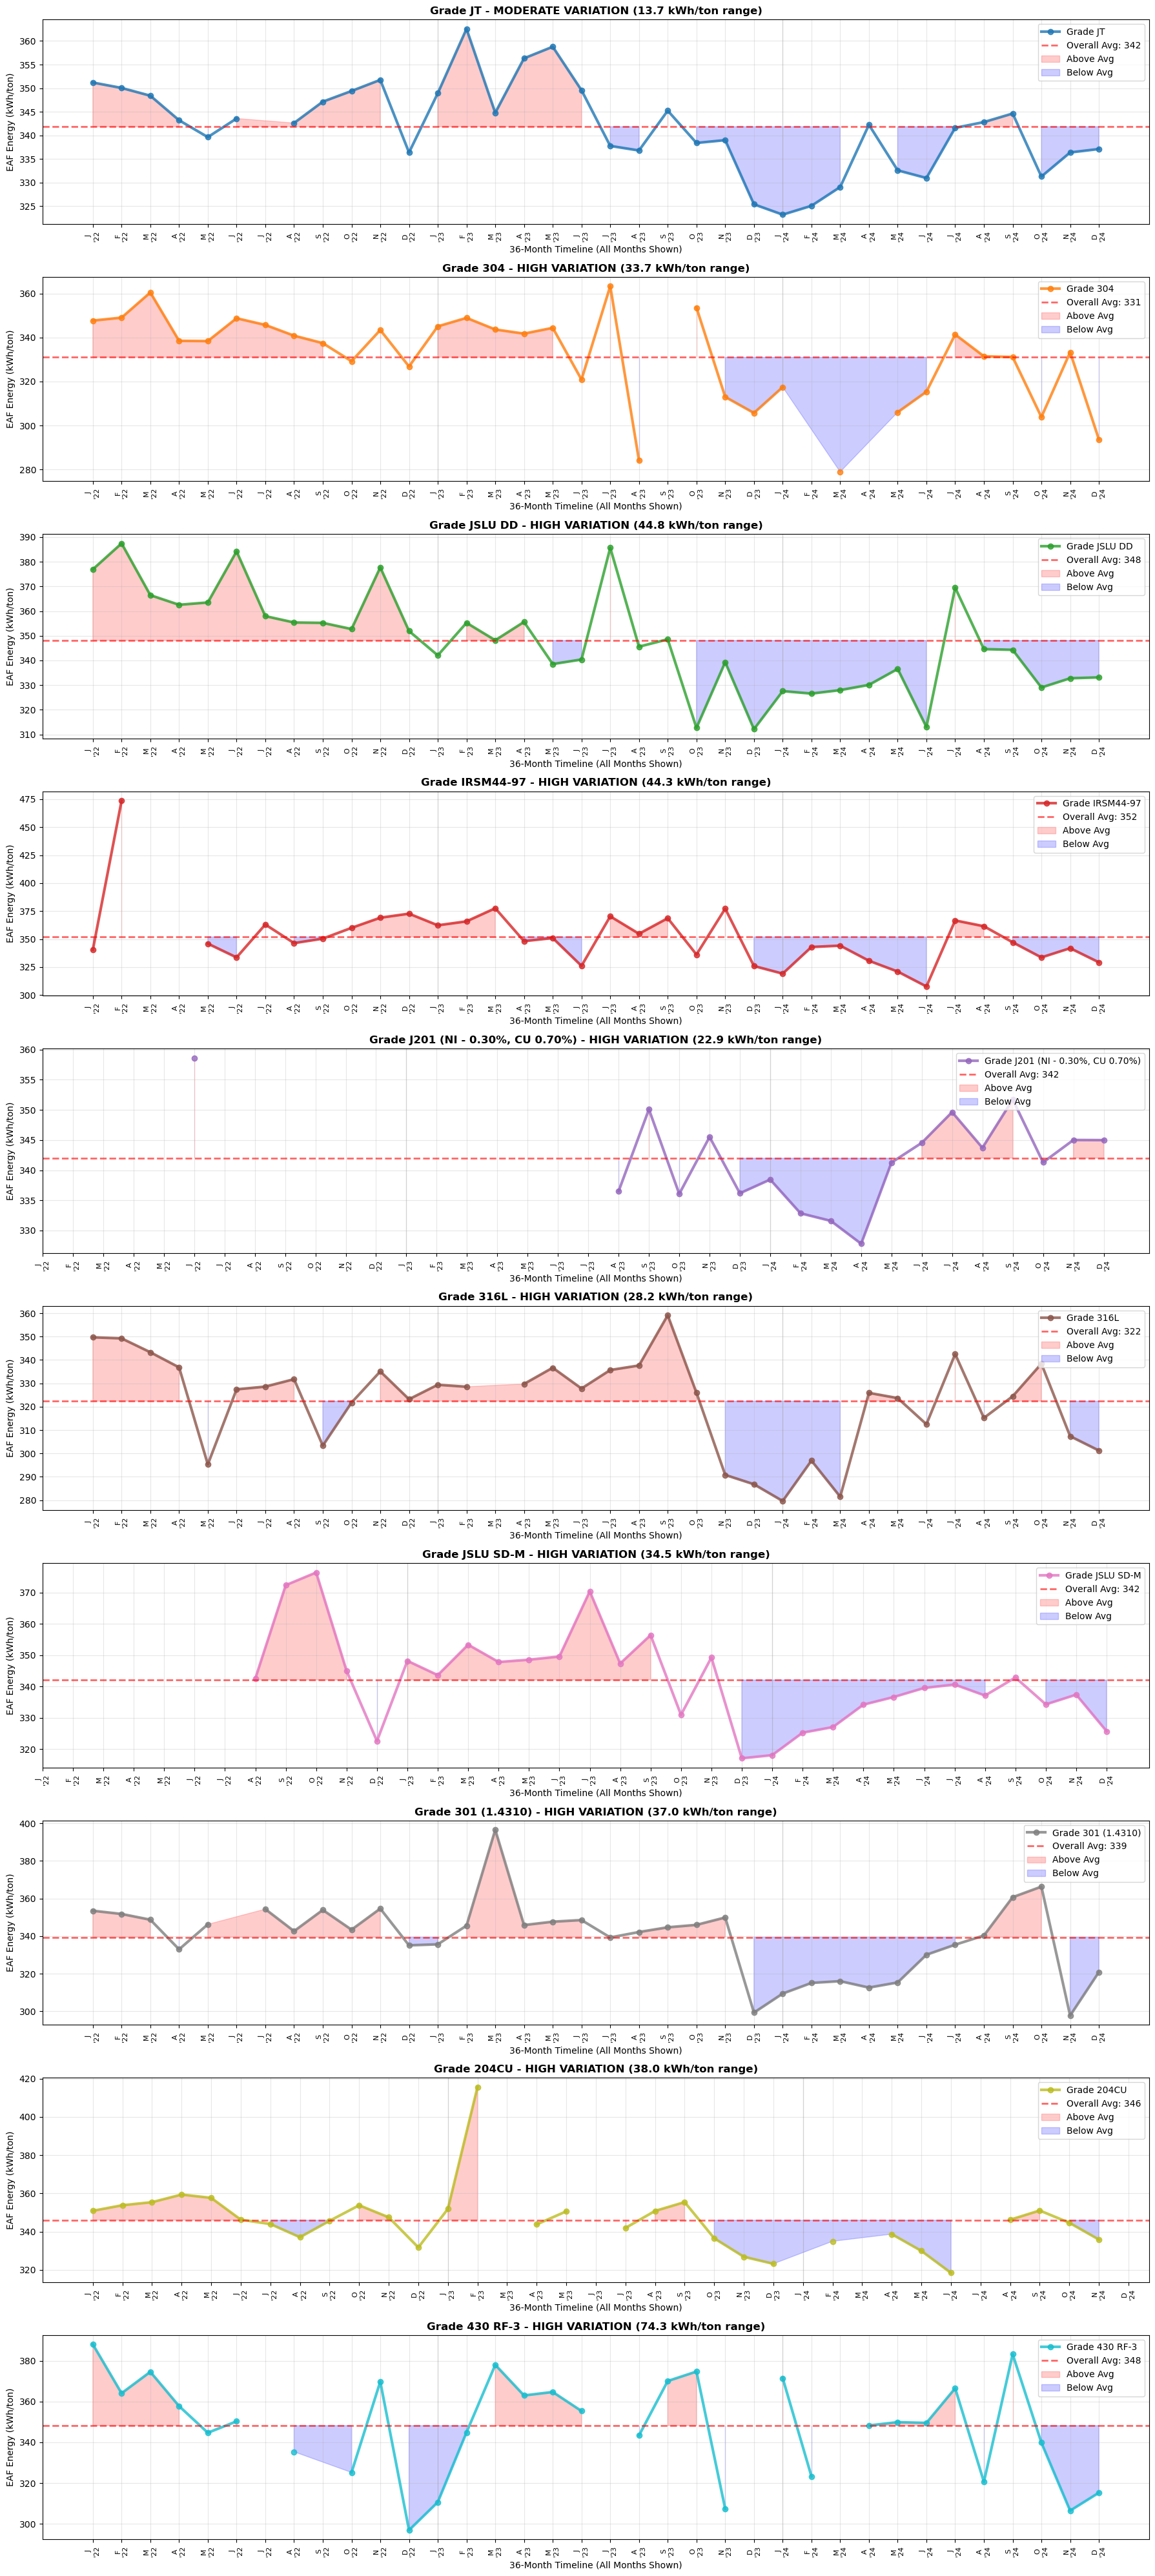

In [12]:
def visualize_high_variation_patterns(df, variation_results):
    """
    Create focused visualizations for grades with high monthly variation
    """
    print("\n🎯 Visualizing High Monthly Variation Patterns...")
    
    # Filter for high variation patterns
    high_variation_grades = [result['Grade'] for result in variation_results 
                           if result['Variation_Strength'] in ['HIGH VARIATION', 'MODERATE VARIATION']]
    
    if not high_variation_grades:
        print("❌ No high variation patterns detected")
        return
    
    print(f"🎯 Grades with significant monthly variation: {high_variation_grades}")
    
    # Create detailed visualization for high variation grades
    n_plots = len(high_variation_grades)
    fig, axes = plt.subplots(n_plots, 1, figsize=(18, 4 * n_plots))
    
    if n_plots == 1:
        axes = [axes]
    
    colors = plt.cm.tab10(np.linspace(0, 1, n_plots))
    
    for idx, grade in enumerate(high_variation_grades):
        ax = axes[idx]
        grade_data = df[df['grade'] == grade].copy()
        
        # Create continuous timeline
        timeline_data = []
        for year in [2022, 2023, 2024]:
            for month in range(1, 13):
                month_data = grade_data[(grade_data['year'] == year) & (grade_data['month'] == month)]
                if len(month_data) > 0:
                    avg_energy = month_data['kwh_per_ton'].mean()
                    timeline_data.append(avg_energy)
                else:
                    timeline_data.append(np.nan)
        
        # Plot with enhanced styling
        months = list(range(1, 37))
        ax.plot(months, timeline_data, 
               linewidth=3, 
               marker='o', 
               markersize=6,
               color=colors[idx],
               alpha=0.8,
               label=f'Grade {grade}')
        
        # Fill between line and average for visual impact
        valid_data = [x for x in timeline_data if not np.isnan(x)]
        if valid_data:
            overall_avg = np.mean(valid_data)
            ax.axhline(y=overall_avg, color='red', linestyle='--', linewidth=2, alpha=0.6, label=f'Overall Avg: {overall_avg:.0f}')
            
            # Fill area above and below average
            x_fill = [m for m, e in zip(months, timeline_data) if not np.isnan(e)]
            y_fill = [e for e in timeline_data if not np.isnan(e)]
            ax.fill_between(x_fill, y_fill, overall_avg, where=np.array(y_fill) > overall_avg, 
                           alpha=0.2, color='red', label='Above Avg')
            ax.fill_between(x_fill, y_fill, overall_avg, where=np.array(y_fill) < overall_avg, 
                           alpha=0.2, color='blue', label='Below Avg')
        
        # Customize with variation info
        var_info = next((r for r in variation_results if r['Grade'] == grade), None)
        if var_info:
            title = f'Grade {grade} - {var_info["Variation_Strength"]} ({var_info["Variation_Range"]:.1f} kWh/ton range)'
        else:
            title = f'Grade {grade} - Monthly Variation'
            
        ax.set_title(title, fontsize=12, fontweight='bold')
        ax.set_xlabel('36-Month Timeline (All Months Shown)')
        ax.set_ylabel('EAF Energy (kWh/ton)')
        ax.legend(loc='upper right')
        ax.grid(True, alpha=0.3)
        
        # Show all 36 months clearly
        month_labels = []
        month_names = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
        for i in range(36):
            year = 2022 + (i // 12)
            month = (i % 12)
            month_labels.append(f"{month_names[month]}\n'{str(year)[-2:]}")
        
        ax.set_xticks(range(1, 37))
        ax.set_xticklabels(month_labels, rotation=90, fontsize=8)
        
        # Add subtle year separators
        for year_marker in [13, 25]:
            ax.axvline(x=year_marker, color='gray', linestyle='-', alpha=0.2, linewidth=1)
    
    plt.tight_layout()
    plt.show()

# Run focused visualization
if df is not None and 'variation_results' in locals():
    visualize_high_variation_patterns(df, variation_results)


📊 Creating Clean 36-Month Trends for All Series...
📈 Analyzing 4 series: ['200 series', '300 series', '400 series', 'Jbs']


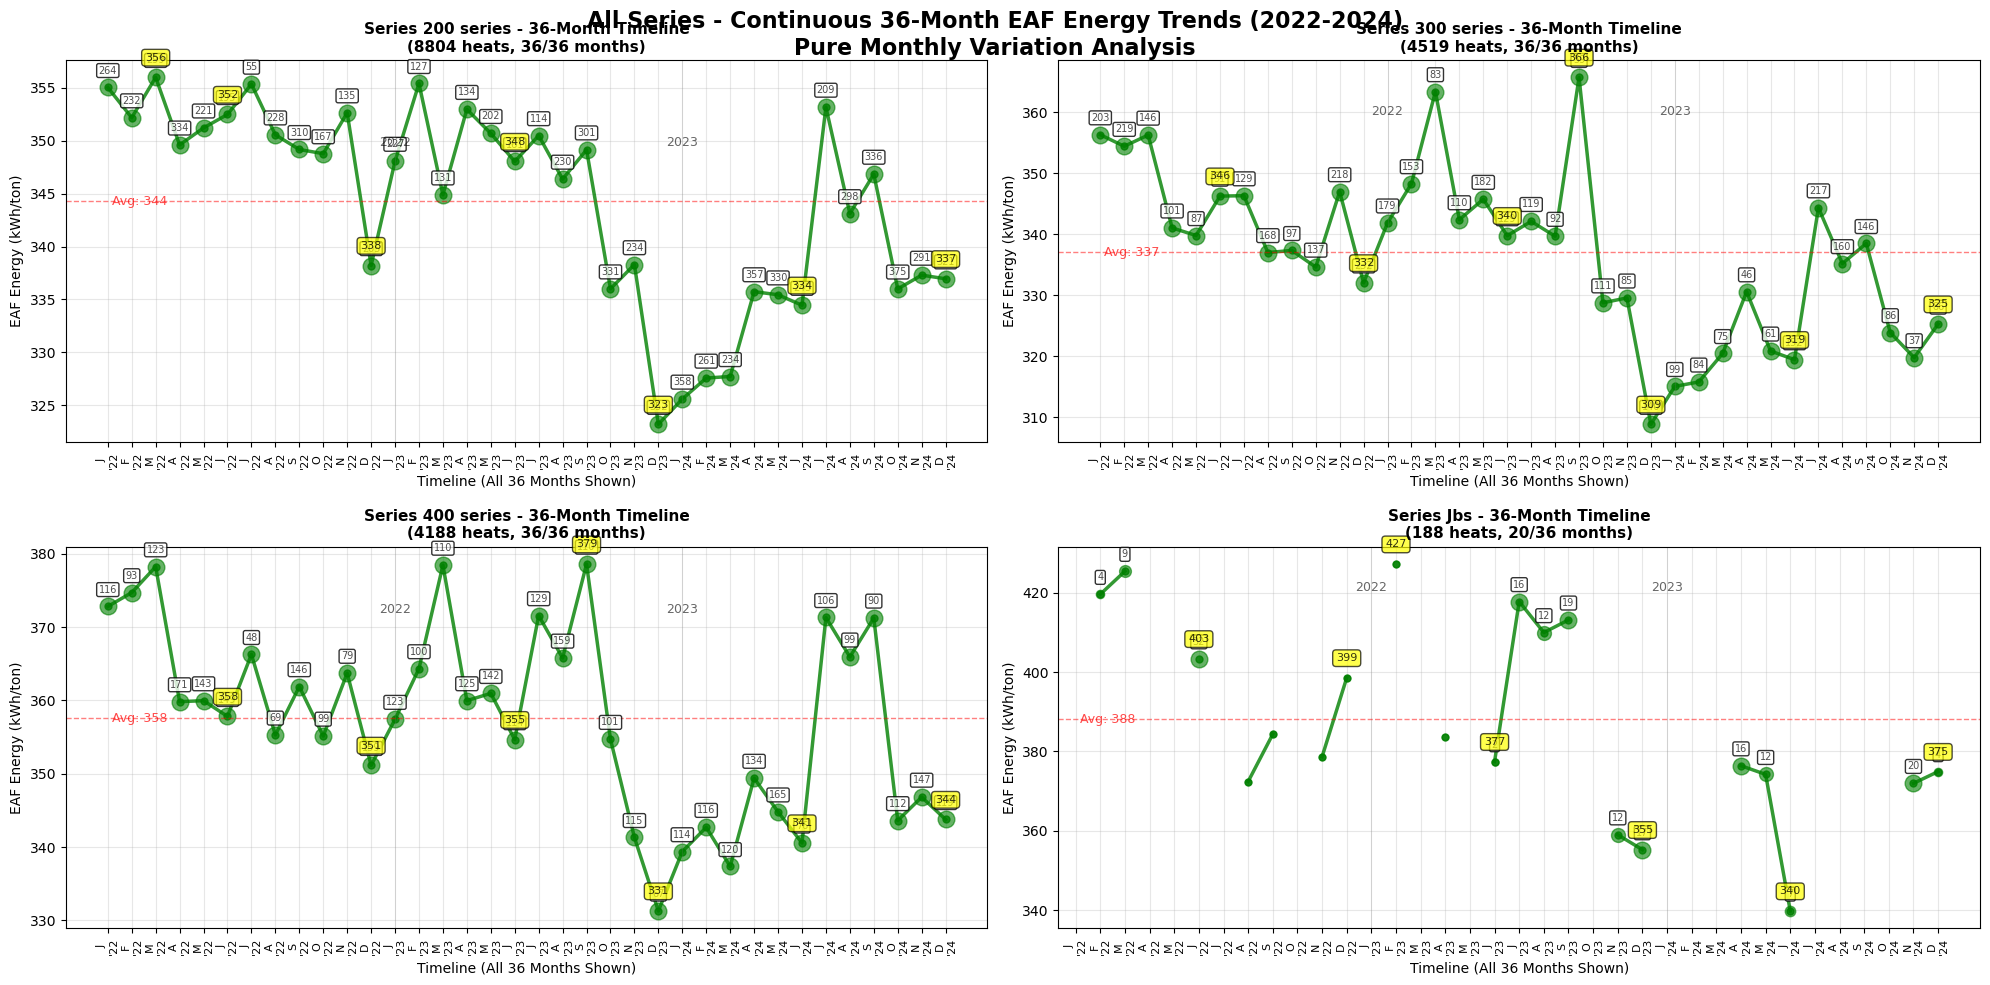

In [13]:
def create_series_36month_trends(df, has_series):
    """
    Create clean 36-month timeline for all series showing all months clearly
    No seasonal markings - just pure monthly variation
    """
    if not has_series:
        print("❌ No series data available")
        return None
    
    print("\n📊 Creating Clean 36-Month Trends for All Series...")
    
    # Get all series
    all_series = sorted(df['series'].unique())
    print(f"📈 Analyzing {len(all_series)} series: {all_series}")
    
    # Create a large figure for detailed analysis
    n_series = len(all_series)
    n_cols = 2  # 2 columns for wider plots
    n_rows = (n_series + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    fig.suptitle('All Series - Continuous 36-Month EAF Energy Trends (2022-2024)\nPure Monthly Variation Analysis', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    # Flatten axes array for easy iteration
    if n_series > 1:
        axes_flat = axes.flatten()
    else:
        axes_flat = [axes]
    
    # Create detailed month labels for all 36 months
    month_labels = []
    month_names = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
    for i in range(36):
        year = 2022 + (i // 12)
        month = (i % 12)
        month_labels.append(f"{month_names[month]}\n'{str(year)[-2:]}")
    
    for idx, series in enumerate(all_series):
        if idx >= len(axes_flat):
            break
            
        ax = axes_flat[idx]
        series_data = df[df['series'] == series].copy()
        
        # Check if we have data for this series
        if len(series_data) == 0:
            ax.text(0.5, 0.5, f'No data for\nSeries {series}', 
                   ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title(f'Series {series}', fontsize=12, fontweight='bold')
            continue
        
        # Create continuous timeline data
        timeline_data = []
        data_points_per_month = []  # Track how many data points per month
        
        for year in [2022, 2023, 2024]:
            for month in range(1, 13):
                month_data = series_data[(series_data['year'] == year) & (series_data['month'] == month)]
                if len(month_data) > 0:
                    avg_energy = month_data['kwh_per_ton'].mean()
                    timeline_data.append(avg_energy)
                    data_points_per_month.append(len(month_data))
                else:
                    timeline_data.append(np.nan)
                    data_points_per_month.append(0)
        
        # Plot the continuous 36-month timeline
        months = list(range(1, 37))
        line = ax.plot(months, timeline_data, 
                      linewidth=2.5, 
                      marker='o', 
                      markersize=5,
                      color='green',
                      alpha=0.8,
                      label='Monthly Energy')
        
        # Add data point size indication (larger markers for more data points)
        for i, (month, energy, count) in enumerate(zip(months, timeline_data, data_points_per_month)):
            if not np.isnan(energy) and count > 0:
                marker_size = 4 + min(count / 2, 8)  # Scale marker size with data point count
                ax.plot(month, energy, 'o', 
                       markersize=marker_size,
                       color='green',
                       alpha=0.6)
                
                # Add data point count for months with multiple heats
                if count > 1:
                    ax.annotate(f'{count}', 
                              (month, energy),
                              textcoords="offset points",
                              xytext=(0, 10),
                              ha='center',
                              fontsize=7,
                              alpha=0.7,
                              bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))
        
        # Add value labels for key points (min, max, and every 6 months)
        if not all(np.isnan(timeline_data)):
            valid_data = [(m, e) for m, e in zip(months, timeline_data) if not np.isnan(e)]
            if valid_data:
                energies = [e for m, e in valid_data]
                min_energy = min(energies)
                max_energy = max(energies)
                
                for month, energy in valid_data:
                    if energy in [min_energy, max_energy] or month % 6 == 0:  # Min, max, and every 6 months
                        ax.annotate(f'{energy:.0f}', 
                                  (month, energy),
                                  textcoords="offset points",
                                  xytext=(0, 12),
                                  ha='center',
                                  fontsize=8,
                                  alpha=0.8,
                                  bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))
        
        # Customize the subplot
        total_heats = len(series_data)
        data_coverage = sum(1 for x in timeline_data if not np.isnan(x))
        
        ax.set_title(f'Series {series} - 36-Month Timeline\n({total_heats} heats, {data_coverage}/36 months)', 
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Timeline (All 36 Months Shown)')
        ax.set_ylabel('EAF Energy (kWh/ton)')
        ax.grid(True, alpha=0.3)
        
        # Show ALL 36 months on x-axis
        ax.set_xticks(range(1, 37))
        ax.set_xticklabels(month_labels, rotation=90, fontsize=8)
        
        # Add year separators with subtle styling
        for year_marker in [13, 25]:
            ax.axvline(x=year_marker, color='gray', linestyle='-', alpha=0.3, linewidth=0.5)
            ax.text(year_marker, ax.get_ylim()[1] * 0.98, f"202{year_marker//12 + 1}", 
                   ha='center', va='top', fontsize=9, alpha=0.6)
        
        # Add some statistics to the plot
        valid_energies = [e for e in timeline_data if not np.isnan(e)]
        if valid_energies:
            avg_energy = np.mean(valid_energies)
            ax.axhline(y=avg_energy, color='red', linestyle='--', alpha=0.5, linewidth=1)
            ax.text(1, avg_energy, f' Avg: {avg_energy:.0f}', 
                   va='center', fontsize=9, color='red', alpha=0.7)
    
    # Hide empty subplots
    for idx in range(len(all_series), len(axes_flat)):
        axes_flat[idx].set_visible(False)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    return all_series

# Run the series 36-month analysis
if df is not None and has_series:
    all_series = create_series_36month_trends(df, has_series)
else:
    print("❌ No series data for continuous timeline analysis")

In [14]:
def analyze_series_monthly_variation(df, has_series):
    """
    Analyze pure monthly variation patterns for series without seasonal assumptions
    """
    if not has_series:
        print("❌ No series data available")
        return None
    
    print("\n📈 Analyzing Pure Monthly Variation Patterns for Series...")
    print("="*80)
    
    series_variation_results = []
    all_series = sorted(df['series'].unique())
    
    for series in all_series:
        series_data = df[df['series'] == series].copy()
        
        if len(series_data) < 12:  # Need at least 1 year of data
            continue
        
        # Create monthly averages across all years
        monthly_patterns = {}
        monthly_std = {}
        
        for month in range(1, 13):
            month_data = series_data[series_data['month'] == month]['kwh_per_ton']
            if len(month_data) > 0:
                monthly_patterns[month] = month_data.mean()
                monthly_std[month] = month_data.std()
        
        if len(monthly_patterns) < 6:  # Need at least 6 months of data
            continue
        
        # Calculate variation metrics
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        
        energies = list(monthly_patterns.values())
        avg_energy = np.mean(energies)
        max_energy = max(energies)
        min_energy = min(energies)
        variation_range = max_energy - min_energy
        variation_percentage = (variation_range / avg_energy) * 100
        
        # Find peak and trough months
        peak_month = max(monthly_patterns, key=monthly_patterns.get)
        trough_month = min(monthly_patterns, key=monthly_patterns.get)
        
        # Pattern classification based on variation
        if variation_range > 20:
            variation_strength = "HIGH VARIATION"
        elif variation_range > 10:
            variation_strength = "MODERATE VARIATION" 
        else:
            variation_strength = "LOW VARIATION"
        
        # Check for consistent patterns across years
        year_consistency = []
        for year in [2022, 2023, 2024]:
            year_data = series_data[series_data['year'] == year]
            if len(year_data) >= 6:  # At least 6 months of data
                year_avg = year_data['kwh_per_ton'].mean()
                year_consistency.append(year_avg)
        
        consistency_score = np.std(year_consistency) / np.mean(year_consistency) * 100 if len(year_consistency) > 1 else 100
        
        # Calculate trend over 3 years
        timeline_data = []
        for year in [2022, 2023, 2024]:
            for month in range(1, 13):
                month_data = series_data[(series_data['year'] == year) & (series_data['month'] == month)]
                if len(month_data) > 0:
                    avg_energy = month_data['kwh_per_ton'].mean()
                    timeline_data.append(avg_energy)
        
        if len(timeline_data) >= 6:
            # Simple linear trend
            x = list(range(len(timeline_data)))
            slope, intercept = np.polyfit(x, timeline_data, 1)
            trend_direction = "INCREASING" if slope > 0.5 else "DECREASING" if slope < -0.5 else "STABLE"
            trend_magnitude = abs(slope) * 12  # Annual trend
        else:
            trend_direction = "INSUFFICIENT DATA"
            trend_magnitude = 0
        
        variation_info = {
            'Series': series,
            'Data_Months': len(monthly_patterns),
            'Avg_Energy': avg_energy,
            'Variation_Range': variation_range,
            'Variation_Percentage': variation_percentage,
            'Variation_Strength': variation_strength,
            'Peak_Month': month_names[peak_month-1],
            'Trough_Month': month_names[trough_month-1],
            'Peak_Trough_Difference': monthly_patterns[peak_month] - monthly_patterns[trough_month],
            'Year_Consistency': consistency_score,
            'Trend_Direction': trend_direction,
            'Trend_Magnitude': trend_magnitude
        }
        
        series_variation_results.append(variation_info)
        
        # Print detailed analysis
        print(f"\n🔍 Series {series}:")
        print(f"   📊 Coverage: {variation_info['Data_Months']}/12 months, Avg: {variation_info['Avg_Energy']:.1f} kWh/ton")
        print(f"   📈 {variation_info['Variation_Strength']}: {variation_info['Variation_Range']:.1f} kWh/ton range ({variation_info['Variation_Percentage']:.1f}%)")
        print(f"   🎯 Pattern: Peak in {variation_info['Peak_Month']}, Trough in {variation_info['Trough_Month']}")
        print(f"   📐 Peak-Trough Difference: {variation_info['Peak_Trough_Difference']:.1f} kWh/ton")
        print(f"   🔄 Year Consistency: {variation_info['Year_Consistency']:.1f}% (lower = more consistent)")
        print(f"   📈 3-Year Trend: {variation_info['Trend_Direction']} ({variation_info['Trend_Magnitude']:.1f} kWh/ton per year)")
        
        # Print monthly pattern
        print(f"   📅 Monthly Pattern: ", end="")
        monthly_values = []
        for month in range(1, 13):
            if month in monthly_patterns:
                monthly_values.append(f"{month_names[month-1]}:{monthly_patterns[month]:.0f}")
        print(", ".join(monthly_values))
    
    return series_variation_results

# Run series monthly variation analysis
if df is not None and has_series:
    series_variation_results = analyze_series_monthly_variation(df, has_series)


📈 Analyzing Pure Monthly Variation Patterns for Series...

🔍 Series 200 series:
   📊 Coverage: 12/12 months, Avg: 337.0 kWh/ton
   📈 HIGH VARIATION: 21.0 kWh/ton range (6.1%)
   🎯 Pattern: Peak in Jul, Trough in Dec
   📐 Peak-Trough Difference: 21.0 kWh/ton
   🔄 Year Consistency: 1.7% (lower = more consistent)
   📈 3-Year Trend: DECREASING (6.9 kWh/ton per year)
   📅 Monthly Pattern: Jan:341, Feb:342, Mar:344, Apr:344, May:344, Jun:344, Jul:353, Aug:346, Sep:348, Oct:338, Nov:341, Dec:332

🔍 Series 300 series:
   📊 Coverage: 12/12 months, Avg: 325.3 kWh/ton
   📈 HIGH VARIATION: 25.7 kWh/ton range (7.6%)
   🎯 Pattern: Peak in Mar, Trough in Dec
   📐 Peak-Trough Difference: 25.7 kWh/ton
   🔄 Year Consistency: 2.0% (lower = more consistent)
   📈 3-Year Trend: DECREASING (9.5 kWh/ton per year)
   📅 Monthly Pattern: Jan:342, Feb:345, Mar:349, Apr:340, May:340, Jun:333, Jul:344, Aug:337, Sep:343, Oct:330, Nov:340, Dec:324

🔍 Series 400 series:
   📊 Coverage: 12/12 months, Avg: 343.8 kWh/ton


📊 Creating Series Comparison Visualization...


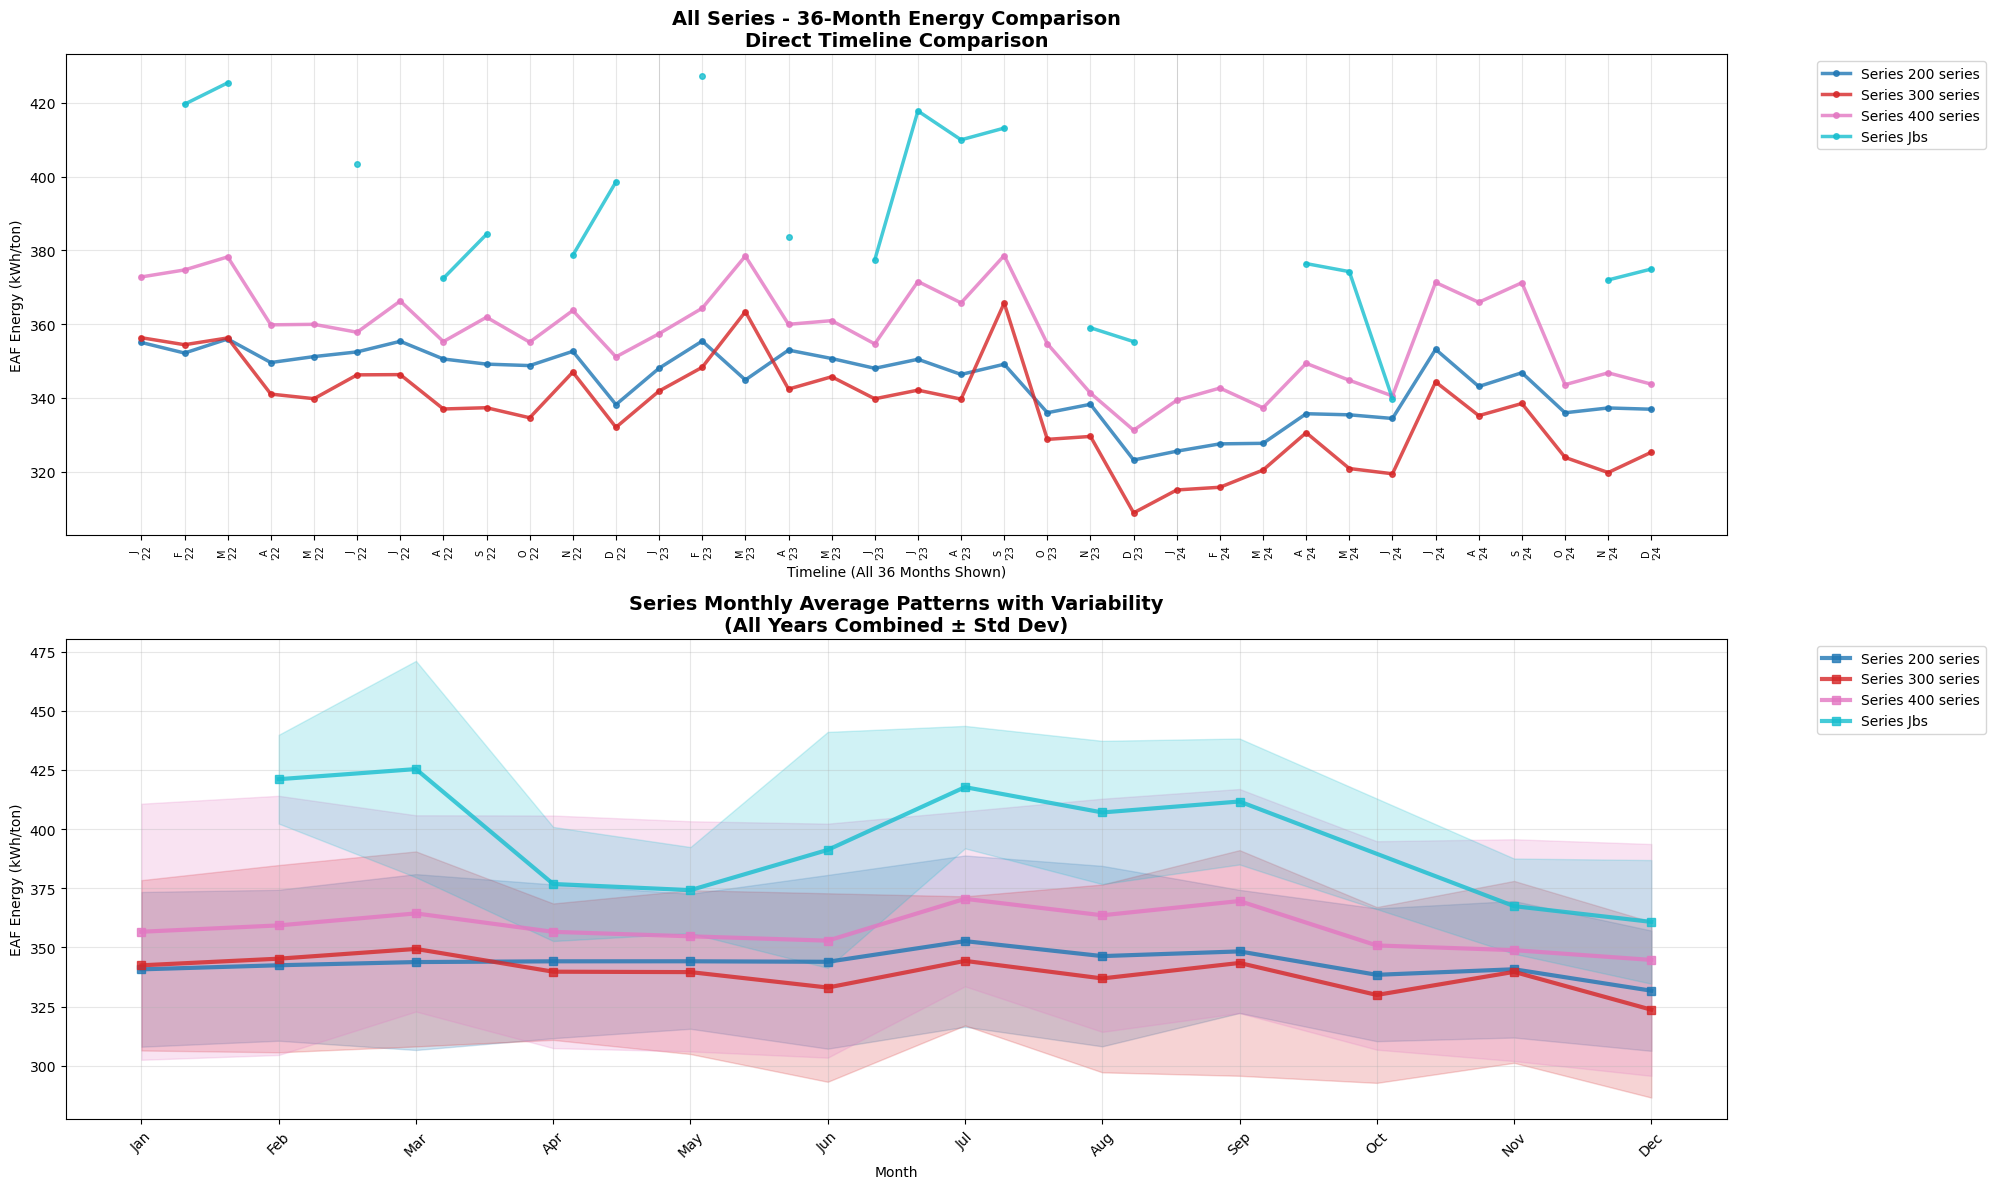


🏆 Series Ranking by Average Energy Consumption:
   1. Series Jbs: 389.1 kWh/ton (HIGH VARIATION, 64.6 range)
   2. Series 400 series: 357.5 kWh/ton (HIGH VARIATION, 25.8 range)
   3. Series 200 series: 342.6 kWh/ton (HIGH VARIATION, 21.0 range)
   4. Series 300 series: 338.8 kWh/ton (HIGH VARIATION, 25.7 range)


In [15]:
def create_series_comparison_visualization(df, has_series, series_variation_results):
    """
    Create comparison visualization showing all series together for easy comparison
    """
    if not has_series:
        print("❌ No series data available")
        return
    
    print("\n📊 Creating Series Comparison Visualization...")
    
    all_series = sorted(df['series'].unique())
    
    # Create a single comprehensive figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
    
    # Plot 1: All series on same timeline for direct comparison
    colors = plt.cm.tab10(np.linspace(0, 1, len(all_series)))
    
    for idx, series in enumerate(all_series):
        series_data = df[df['series'] == series].copy()
        
        # Create continuous timeline
        timeline_data = []
        for year in [2022, 2023, 2024]:
            for month in range(1, 13):
                month_data = series_data[(series_data['year'] == year) & (series_data['month'] == month)]
                if len(month_data) > 0:
                    avg_energy = month_data['kwh_per_ton'].mean()
                    timeline_data.append(avg_energy)
                else:
                    timeline_data.append(np.nan)
        
        # Plot with series-specific color
        months = list(range(1, 37))
        ax1.plot(months, timeline_data, 
                linewidth=2.5, 
                marker='o', 
                markersize=4,
                color=colors[idx],
                alpha=0.8,
                label=f'Series {series}')
    
    ax1.set_title('All Series - 36-Month Energy Comparison\nDirect Timeline Comparison', 
                 fontsize=14, fontweight='bold')
    ax1.set_xlabel('Timeline (All 36 Months Shown)')
    ax1.set_ylabel('EAF Energy (kWh/ton)')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # Set x-axis with all months
    month_labels = []
    month_names = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
    for i in range(36):
        year = 2022 + (i // 12)
        month = (i % 12)
        month_labels.append(f"{month_names[month]}\n'{str(year)[-2:]}")
    
    ax1.set_xticks(range(1, 37))
    ax1.set_xticklabels(month_labels, rotation=90, fontsize=7)
    
    # Add year separators
    for year_marker in [13, 25]:
        ax1.axvline(x=year_marker, color='gray', linestyle='-', alpha=0.3, linewidth=0.5)
    
    # Plot 2: Monthly average patterns (all years combined)
    for idx, series in enumerate(all_series):
        series_data = df[df['series'] == series].copy()
        
        # Calculate monthly averages across all years
        monthly_avg = series_data.groupby('month')['kwh_per_ton'].mean()
        monthly_std = series_data.groupby('month')['kwh_per_ton'].std()
        
        if len(monthly_avg) > 0:
            ax2.plot(monthly_avg.index, monthly_avg.values,
                    linewidth=3,
                    marker='s',
                    markersize=6,
                    color=colors[idx],
                    alpha=0.8,
                    label=f'Series {series}')
            
            # Add error bars for standard deviation
            ax2.fill_between(monthly_avg.index, 
                            monthly_avg - monthly_std, 
                            monthly_avg + monthly_std,
                            alpha=0.2, color=colors[idx])
    
    ax2.set_title('Series Monthly Average Patterns with Variability\n(All Years Combined ± Std Dev)', 
                 fontsize=14, fontweight='bold')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('EAF Energy (kWh/ton)')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    ax2.set_xticks(range(1, 13))
    ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print series ranking by energy consumption
    print(f"\n🏆 Series Ranking by Average Energy Consumption:")
    print("="*60)
    
    series_ranking = []
    for series in all_series:
        series_data = df[df['series'] == series]
        if len(series_data) > 0:
            avg_energy = series_data['kwh_per_ton'].mean()
            series_ranking.append((series, avg_energy))
    
    # Sort by energy consumption (highest first)
    series_ranking.sort(key=lambda x: x[1], reverse=True)
    
    for rank, (series, energy) in enumerate(series_ranking, 1):
        var_info = next((r for r in series_variation_results if r['Series'] == series), None)
        if var_info:
            variation_info = f"({var_info['Variation_Strength']}, {var_info['Variation_Range']:.1f} range)"
        else:
            variation_info = "(insufficient data)"
        
        print(f"   {rank}. Series {series}: {energy:.1f} kWh/ton {variation_info}")

# Run series comparison visualization
if df is not None and has_series and 'series_variation_results' in locals():
    create_series_comparison_visualization(df, has_series, series_variation_results)